# Algorithms and Big Data in Chemistry and Materials
## Hometask 2


For this task, you should use the dataset from the first homework. Your dataset must contain at least 1000 descriptors, excluding the target ("raw_value"), and all the data cleansing steps must have been completed.

Your task:

1. Create at least 3 different types of statistical plots and 1 interactive plot to analyze your data. Use seaborn and plotly to visualize them. Draw conclusions and explain why the graphs are useful for analyzing your data.

2. Perform statistical tests for one categorical variable and multiple numeric descriptors. Draw conclusions and interpret your results.

3. Calculate correlation coefficients for your dataset and investigate multicollinearity. Visualize and interpret your results.

4. Choose one linear (except PCA) and one non-linear dimension reduction method. Run them on your data. It is preferable to use seaborn and plotly to visualize results. Justify the choice of the number of components / dimensions and explain them.

Complete all the steps of the assignment in a Jupyter Notebook (one per team). Upload the finalized Jupyter Notebook to the Google Drive of the course or GitHub. The deadline for completing all homework assignments is 23:59 of 24.03.

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install cmasher
!pip install jupyter-dash
!pip install umap-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import cmasher as cmr
import umap.umap_ as umap
from itertools import product
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from scipy.stats import ttest_ind
import sklearn
import umap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from matplotlib import cm

c:\Users\iyale\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\iyale\AppData\Local\Temp\ipykernel_8224\340398507.py:16: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\iyale\AppData\Local\Temp\ipykernel_8224\340398507.py:17: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


## 0. Working with data

In [3]:
#Reading a file
df = pd.read_excel('df_afterhw1.xlsx')
df

Unnamed: 0.1  Unnamed: 0                                 DOI       Date  \
0                0           0  10.1016/j.materresbull.2017.08.038  8/25/2017   
1                1        1108  10.1016/j.materresbull.2017.08.038  8/25/2017   
2                2        1403         10.1016/j.ijleo.2018.01.112  1/31/2018   
3                3        2813         10.1016/j.ijleo.2018.01.112  1/31/2018   
4                4           1       10.1016/S0021-9797(03)00199-1  4/26/2003   
...            ...         ...                                 ...        ...   
3357          3357        4961           10.1016/j.jct.2015.08.021  8/24/2015   
3358          3358        4964           10.1016/j.gca.2014.04.009  4/18/2014   
3359          3359        4970        10.1016/j.ophtha.2013.01.005   2/8/2013   
3360          3360        4976        10.1016/j.opelre.2019.01.001  3/19/2019   
3361          3361        4987       10.1016/S0040-6031(03)00368-X   8/8/2003   

                                       Journal  \
0                  Materials Research Bulletin   
1                  Materials Research Bulletin   
2                                        Optik   
3                                        Optik   
4     Journal of Colloid and Interface Science   
...                                        ...   
3357    The Journal of Chemical Thermodynamics   
3358           Geochimica et Cosmochimica Acta   
3359                             Ophthalmology   
3360                   Opto-Electronics Review   
3361                        Thermochimica Acta   

                                                  Title             Name  \
0     CDCL2TREATMENTCONCENTRATIONEVOLUTIONPHYSICALPR...            CdCl2   
1     CDCL2TREATMENTCONCENTRATIONEVOLUTIONPHYSICALPR...            CdCl2   
2     EFFECTCDCL2HEATTREATMENTINARO2ATMOSPHERESTRUCT...            CdCl2   
3     EFFECTCDCL2HEATTREATMENTINARO2ATMOSPHERESTRUCT...            CdCl2   
4     EVALUATIONDLVOTHEORYDISJOININGPRESSUREFILMCOND...        Dodecanol   
...                                                 ...              ...   
3357  STUDYINTERMOLECULARINTERACTIONSTHROUGHDIELECTR...     Amyl alcohol   
3358  SILICATESPECIATIONINH2ONA2OSIO2FLUIDS340MOLSIO...           zircon   
3359  ORALDOCOSAHEXAENOICACIDINPREVENTIONEXUDATIVEAG...              DHA   
3360           AREVIEWPROGRESSZNSEINORGANICSCINTILLATOR           Li(Eu)   
3361  ACOUSTICVOLUMETRICCOMPRESSIBILITYREFRACTIVITYP...  Methylethanoate   

      measurement_error measurement_wavelength measurement_method  ...  \
0                   0.0                    NaN      el_cde_tables  ...   
1                   0.0                    NaN         el_mylogic  ...   
2                   0.0                   0 nm         el_mylogic  ...   
3                   0.0                    NaN      el_cde_tables  ...   
4                   0.0                    NaN         el_mylogic  ...   
...                 ...                    ...                ...  ...   
3357                0.0                    NaN      el_cde_tables  ...   
3358                0.0                    NaN         el_mylogic  ...   
3359                0.0                    NaN      el_cde_tables  ...   
3360                0.0                    NaN      el_cde_tables  ...   
3361                0.0                    NaN         el_mylogic  ...   

         SRW10     TSRW10          MW        AMW      WPath WPol Zagreb1  \
0     0.000000   3.000000  183.841064  61.280355  300000000    0       0   
1     0.000000   3.000000  183.841064  61.280355  300000000    0       0   
2     0.000000   3.000000  183.841064  61.280355  300000000    0       0   
3     0.000000   3.000000  183.841064  61.280355  300000000    0       0   
4     7.826044  40.245095  186.198365   4.774317        364   10      46   
...        ...        ...         ...        ...        ...  ...     ...   
3357  6.608001  28.105124   88.088815   4.893823         35    3      18   
3358  7.625107  30.418

### 0.1. Deleting Repetitions
Many individual connections are repeated in the dataset, so we will remove them and replace the values with averages with the std condition, in cases where std is large, we will first remove the outliers, and then replace them with the average

In [4]:
# Grouping and calculating the number, average and standard deviation of duplicate cells
repeat_df = df[['SMILES', 'Refractive_index']].groupby(['SMILES']).agg(['count', 'mean', 'std'])
repeat_df.columns = ['_'.join(col).rstrip('_') for col in repeat_df.columns.values] #Names for new columns
repeat_df = repeat_df[repeat_df['Refractive_index_count'] != 1].sort_values('Refractive_index_count', ascending = False) #Sort in descending order
repeat_df

Refractive_index_count  Refractive_index_mean  \
SMILES                                                                  
O=[Si]=O                                   174               1.477565   
CCO                                        164               1.449367   
O=[Ti]=O                                   129               2.284182   
CO                                          86               1.407751   
[SiH4]                                      72               2.671554   
...                                        ...                    ...   
ICI                                          2               1.740500   
NC(CO)(CO)CO                                 2               1.331000   
NC1=Nc2nc[nH]c2C(=O)N1                       2               1.365000   
NO                                           2               1.735000   
ClC=C(Cl)Cl                                  2               1.449500   

                        Refractive_index_std  
SMILES                                        
O=[Si]=O                            0.256143  
CCO                                 0.329269  
O=[Ti]=O                            0.410611  
CO                                  0.295800  
[SiH4]                              0.966801  
...                                      ...  
ICI                                 0.000707  
NC(CO)(CO)CO                        0.001414  
NC1=Nc2nc[nH]c2C(=O)N1              0.077782  
NO                                  0.374767  
ClC=C(Cl)Cl                         0.038184  

[345 rows x 3 columns]

Since there is a rather large deviation for all cases and it is impossible to view it, let's take the median value for all cases

In [5]:
# Updated repeat_df
repeat_df = df[['SMILES', 'Refractive_index']].groupby(['SMILES']).agg('median')
repeat_df


Refractive_index
SMILES                         
BN                      1.65800
BO                      1.49000
BPCC                    1.50700
BSB                     2.52000
B[V]                    2.09500
...                         ...
c1ccncc1                1.50950
o1cccc1                 1.44400
s1cccc1                 1.42465
s1ccnc1                 1.13000
s1cnc2ccccc12           1.54000

[774 rows x 1 columns]

In [6]:
# Adding information to the main table
df = pd.merge(df, repeat_df, on='SMILES')
# Удаление дублирующихся строк, оставляем только первое вхождение, с учетом определенных столбцов
df = df.drop_duplicates(keep='first', subset=['SMILES', 'Refractive_index_y'])
df

Unnamed: 0.1  Unnamed: 0                                 DOI  \
0                0           0  10.1016/j.materresbull.2017.08.038   
4                4           1       10.1016/S0021-9797(03)00199-1   
6                5           2       10.1016/S0030-4018(00)01152-4   
63              62           3      10.1016/j.ceramint.2013.06.065   
227             84           4          10.1016/j.mssp.2018.06.033   
...            ...         ...                                 ...   
3357          3352        4936                  10.1039/C1JM13650J   
3358          3356        4960         10.1016/j.fluid.2014.10.005   
3359          3358        4964           10.1016/j.gca.2014.04.009   
3360          3359        4970        10.1016/j.ophtha.2013.01.005   
3361          3360        4976        10.1016/j.opelre.2019.01.001   

            Date                                        Journal  \
0      8/25/2017                    Materials Research Bulletin   
4      4/26/2003       Journal of Colloid and Interface Science   
6       2/9/2001                          Optics Communications   
63      7/2/2013                         Ceramics International   
227     7/4/2018  Materials Science in Semiconductor Processing   
...          ...                                            ...   
3357   11/8/2011                 Journal of Materials Chemistry   
3358  10/21/2014                         Fluid Phase Equilibria   
3359   4/18/2014                Geochimica et Cosmochimica Acta   
3360    2/8/2013                                  Ophthalmology   
3361   3/19/2019                        Opto-Electronics Review   

                                                  Title  \
0     CDCL2TREATMENTCONCENTRATIONEVOLUTIONPHYSICALPR...   
4     EVALUATIONDLVOTHEORYDISJOININGPRESSUREFILMCOND...   
6     DISPERSIONOPTICALCONSTANTSQUARTZPOLYMETHYLMETH...   
63    EFFECTDIFFERENTSOLVENTSSTRUCTURALOPTICALPROPER...   
227   VANADIUMPENTOXIDEV2O5ANTIREFLECTIONCOATINGFORG...   
...                                                 ...   
3357  Photoactive lanthanide (Eu 3+ , Tb 3+ ) center...   
3358  ACHEMICALSTRUCTUREBASEDMODELFORESTIMATIONREFRA...   
3359  SILICATESPECIATIONINH2ONA2OSIO2FLUIDS340MOLSIO...   
3360  ORALDOCOSAHEXAENOICACIDINPREVENTIONEXUDATIVEAG...   
3361           AREVIEWPROGRESSZNSEINORGANICSCINTILLATOR   

                            Name  measurement_error measurement_wavelength  \
0                          CdCl2                0.0                    NaN   
4                      Dodecanol                0.0                    NaN   
6                           PMMA                0.0                3000 nm   
63                          EtOH                0.0                    NaN   
227                      silicon                2.0                    NaN   
...                          ...                ...                    ...   
3357                    europium                0.0                    NaN   
3358  Bis(trichlorosilyl)methane                0.0                    NaN   
3359                      zircon                0.0                    NaN   
3360                         DHA                0.0                    NaN   
3361                      Li(Eu)                0.0                    NaN   

     measurement_method  ...     TSRW10          MW         AMW      WPath  \
0         el_cde_tables  ...   3.000000  183.841064   61.280355  300000000   
4            el_mylogic  ...  40.245095  186.198365    4.774317        364   
6            el_mylogic  ...  32.688753  101.060255    6.316266         46   
63           el_mylogic  ...  17.310771   46.041865    5.115763          4   
227         el_cde_text  ...   1.000000   32.008227    6.401645          0   
...                 ...  ...        ...         ...         ...        ...   
3357       rsc_cde_text  ...   1.000000  152.921230  152.921230          0   
3358         el_mylogic  ...  37.856472  279.782619   25.434784         88   
3359        

In [7]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1','Refractive_index_x'], axis = 1)

### 0.2. Deleting extradescriptors
- Delete the descriptors that do not carry any information (that is, all are equal to one number)
- Let's remove the descriptors in which the expressions stand instead of the numerical value

#### 0.2.1. Let's remove the descriptors in which the expressions stand instead of the numerical value

In [8]:
# Selecting columns of the object type
object_cols = list(df.select_dtypes(include=['object']).columns)
#Let's remove the signs we need from the list
for desc in ['DOI', 'Name', 'SMILES', 'measurement_method', 'Right_DOI', 'IUPACName', 'MolecularFormula', 'IsomericSMILES']:
    print(desc)
    object_cols.remove(desc)
# Deleting columns of the object type
df = df.drop(object_cols, axis=1)
df.shape

DOI
Name
SMILES
measurement_method
Right_DOI
IUPACName
MolecularFormula
IsomericSMILES


(774, 958)

#### 0.2.2. Delete the descriptors that do not carry any information (that is, all are equal to one number)

In [9]:
# calculate the standard deviation of each column
stds = df.std()

# create a list of columns with a zero standard deviation
cols_to_drop = stds[stds == 0].index.tolist()

# delete columns with a standard deviation of zero
df = df.drop(columns=cols_to_drop)
df.shape

C:\Users\iyale\AppData\Local\Temp\ipykernel_8224\2631129552.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stds = df.std()


(774, 820)

## 1. Visualization
### 1.1. Separation of substances into organic/inorganic
The properties of substances depend very much on whether they are organic or inorganic, so we will add a descriptor that highlights the type of substance

In [10]:
#Function to search for characters in a string
def contains_only(string, letters):
    return set(string) <= set(letters)

#Function for adding an organic/inorganic column
organic = []
for row in df['SMILES']:
    if contains_only(row, 'CHON#)=(1][+c-') and (('C' in row) or ('c' in row)):
        organic.append('organic')
    else:
        organic.append('nonorganic')

#Adding data to the main table
df['type'] = organic
df.head()

DOI       Name  measurement_error  \
0    10.1016/j.materresbull.2017.08.038      CdCl2                0.0   
4         10.1016/S0021-9797(03)00199-1  Dodecanol                0.0   
6         10.1016/S0030-4018(00)01152-4       PMMA                0.0   
63       10.1016/j.ceramint.2013.06.065       EtOH                0.0   
227          10.1016/j.mssp.2018.06.033    silicon                2.0   

    measurement_method                           Right_DOI  \
0        el_cde_tables  10.1016/j.materresbull.2017.08.038   
4           el_mylogic       10.1016/S0021-9797(03)00199-1   
6           el_mylogic       10.1016/S0030-4018(00)01152-4   
63          el_mylogic      10.1016/j.ceramint.2013.06.065   
227        el_cde_text          10.1016/j.mssp.2018.06.033   

                 SMILES  MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
0    [Cl-].[Cl-].[Cd++]        0.000000        0.000000           0.000000   
4         CCCCCCCCCCCCO        7.983009       -4.832249           7.983009   
6        COC(=O)[C](C)C       11.112940       -3.228588          11.112940   
63                  CCO        6.520833       -2.880208           6.520833   
227              [SiH4]        6.076389       -3.611111           6.076389   

     MinAbsEStateIndex  ...     TSRW10          MW        AMW      WPath  \
0             0.000000  ...   3.000000  183.841064  61.280355  300000000   
4             3.423870  ...  40.245095  186.198365   4.774317        364   
6             1.517477  ...  32.688753  101.060255   6.316266         46   
63            2.854167  ...  17.310771   46.041865   5.115763          4   
227           3.611111  ...   1.000000   32.008227   6.401645          0   

     WPol  Zagreb1  Zagreb2  mZagreb2  Refractive_index_y        type  
0       0        0        0  0.000000              2.2950  nonorganic  
4      10       46       44  3.500000              1.4355     organic  
6       6       26       26  1.777778              1.4900     organic  
63      0        6        4  1.000000              1.3610     organic  
227     0        0        0  0.000000              3.4000  nonorganic  

[5 rows x 821 columns]

### 1.2. Pie Chart
There are two important categorical quantities in our dataset: the measurement method and the type of substance, we will build pie charts for them

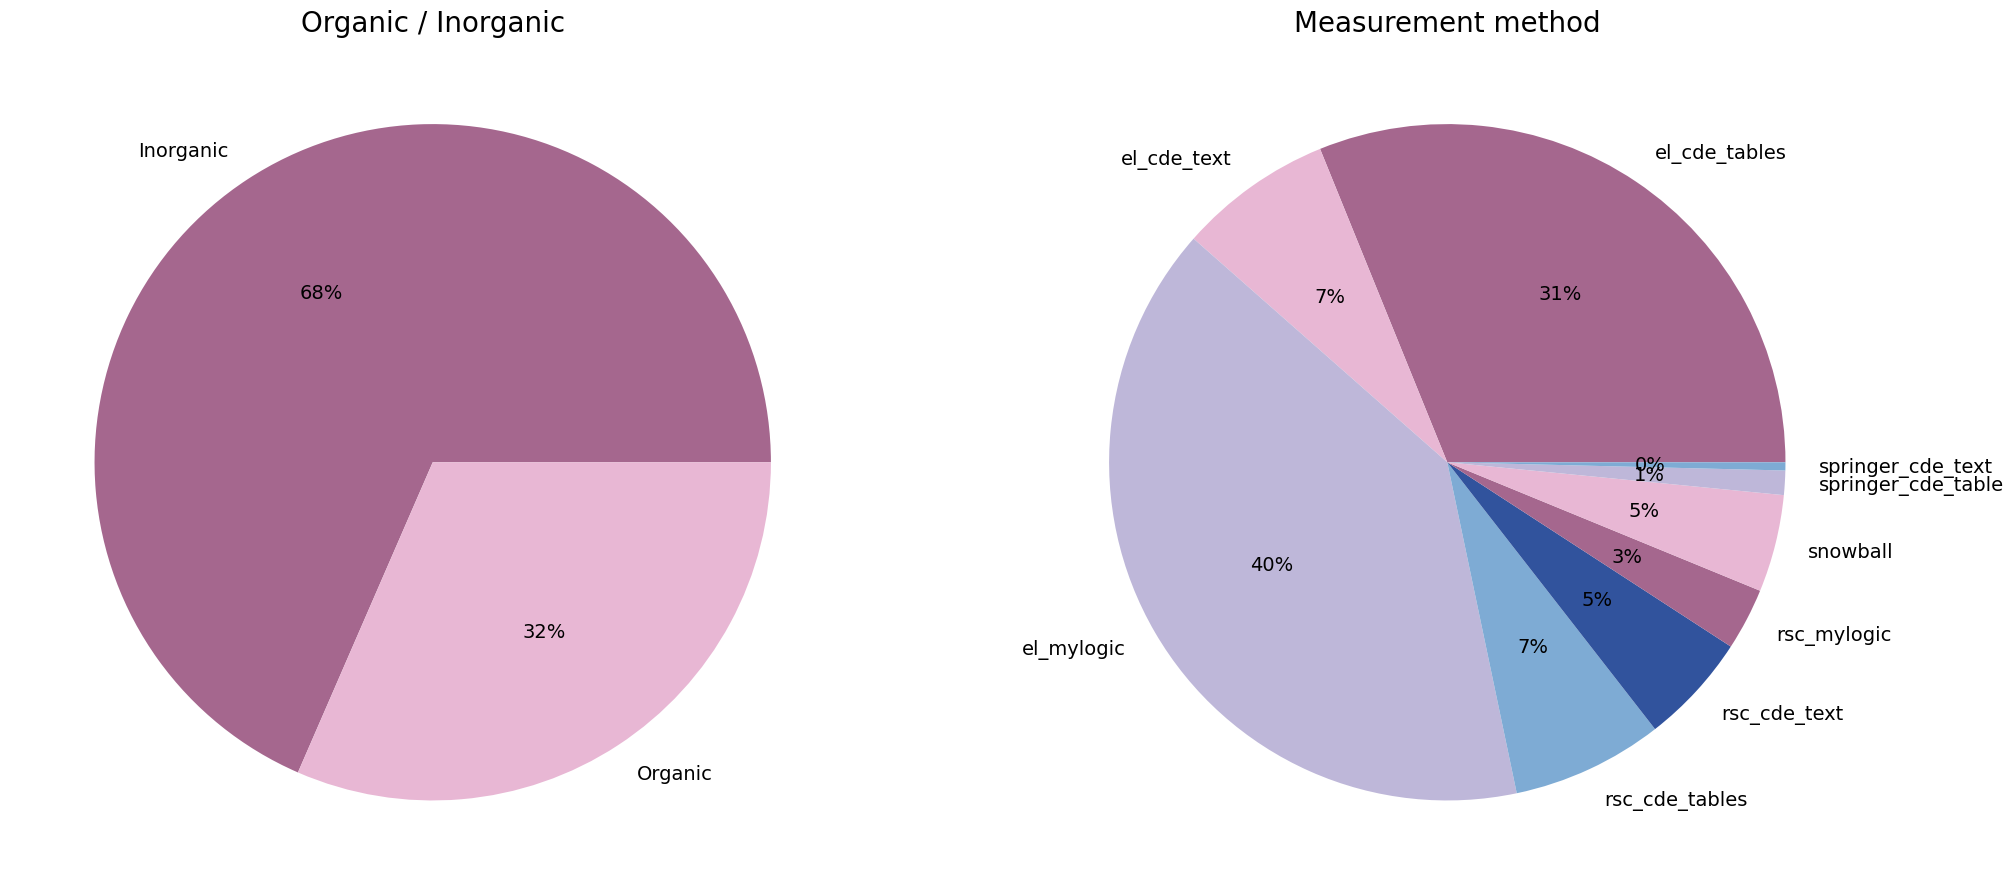

In [11]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Palette of colors
#Building pie charts for objects with a small number of values using matplotlib
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 24)) #Initialization - creating an empty graph
table = df.groupby(['type']).count() #Calculating the number of values
#Change names, colors, add%, increase font
axs[0].pie(table['DOI'], labels = ['Inorganic', 'Organic'], colors = colors, autopct = '%1.0f%%', textprops={'fontsize': 14})
axs[0].set_title('Organic / Inorganic', fontsize = 20) #Title of a separate chart

table = df.groupby(['measurement_method']).count()
axs[1].pie(table['DOI'], labels = table.index, colors = colors, autopct = '%1.0f%%', textprops={'fontsize': 14})
axs[1].set_title('Measurement method', fontsize = 20)

plt.show()

- The amount of inorganic exceeds the amount of organic
- In addition, the graphs show that measurement methods such as el_mylogic and el_cde_tables prevail

### 1.3. Pairplots
- After studying the literature, we selected several descriptors that can affect the refractive index, for which we built pairplots to see their dependence on each other, as well as on the target value

- We also singled out organic and inorganic separately, since the indicators for them may differ

- We deleted the lines with None, because we want to get the dependency that actually exists, filling in the data gaps can distort the data

In [12]:
#Renaming a column
df.rename(columns = {'Refractive_index_y':'Refractive_index'}, inplace = True )

In [13]:
import_desc = df[['Name', 'SMILES', 'MolWt', 'Volume3D', 'RadiusOfGyration', 'SpherocityIndex','HeavyAtomCount', 'HBondDonorCount', 'HBondAcceptorCount', 'NumHeteroatoms', 'NumValenceElectrons', 'type', 'Refractive_index']]
#Delete lines from None
import_desc = import_desc.dropna()
import_desc

Name  \
4                  Dodecanol   
6                       PMMA   
63                      EtOH   
321             polyethylene   
325                  Glucose   
...                      ...   
3349                  Erlose   
3350               scoparone   
3352  2-(Methylamino)ethanol   
3356              d-limonene   
3360                     DHA   

                                                 SMILES    MolWt  Volume3D  \
4                                         CCCCCCCCCCCCO  186.339     171.6   
6                                        COC(=O)[C](C)C  101.125      86.1   
63                                                  CCO   46.069      41.5   
321                                                 C=C   28.054      31.7   
325            OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O  180.156     128.9   
...                                                 ...      ...       ...   
3349  OC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@H](O...  504.438     340.2   
3350                            COc1cc2OC(=O)C=Cc2cc1OC  206.197     158.2   
3352                                              CNCCO   75.111      64.2   
3356                                 CC(=C)C1CCC(=CC1)C  136.238     122.9   
3360      CC\C=C/C/C=C\C\C=C/C/C=C\C\C=C/C/C=C\CCC(O)=O  328.496     292.2   

      RadiusOfGyration  SpherocityIndex  HeavyAtomCount  HBondDonorCount  \
4             3.384694     2.794586e-01            13.0              1.0   
6             1.902565     1.504731e-01             7.0              0.0   
63            1.190703     4.306872e-01             3.0              1.0   
321           0.850246     3.291100e-16             2.0              0.0   
325           2.342298     5.537920e-01            12.0              5.0   
...                ...              ...             ...              ...   
3349          4.924302     2.298508e-01            34.0             11.0   
3350          2.924986     3.608912e-02            15.0              0.0   
3352          1.608362     5.123984e-01             5.0              2.0   
3356          2.443934     3.624929e-01            10.0              0.0   
3360          4.219231     3.334972e-01            24.0              1.0   

      HBondAcceptorCount  NumHeteroatoms  NumValenceElectrons        type  \
4                    1.0               1                   80     organic   
6                    2.0               2                   41     organic   
63                   1.0               1                   20     organic   
321                  0.0               0                   12     organic   
325                  6.0               6                   72  nonorganic   
...                  ...             ...                  ...         ...   
3349                16.0              16                  200  nonorganic   
3350                 4.0               4                   78  nonorganic   
3352                 2.0               2                   32     organic   
3356                 0.0               0                   56     organic   
3360                 2.0               2                  132  nonorganic   

      Refractive_index  
4               1.4355  
6               1.4900  
63              1.3610  
321             1.4300  
325             1.3460  
...                ...  
3349            2.6800  
3350            1.1900  
3352            1.4390  
3356            1.4730  
3360            3.0400  

[514 rows x 13 columns]

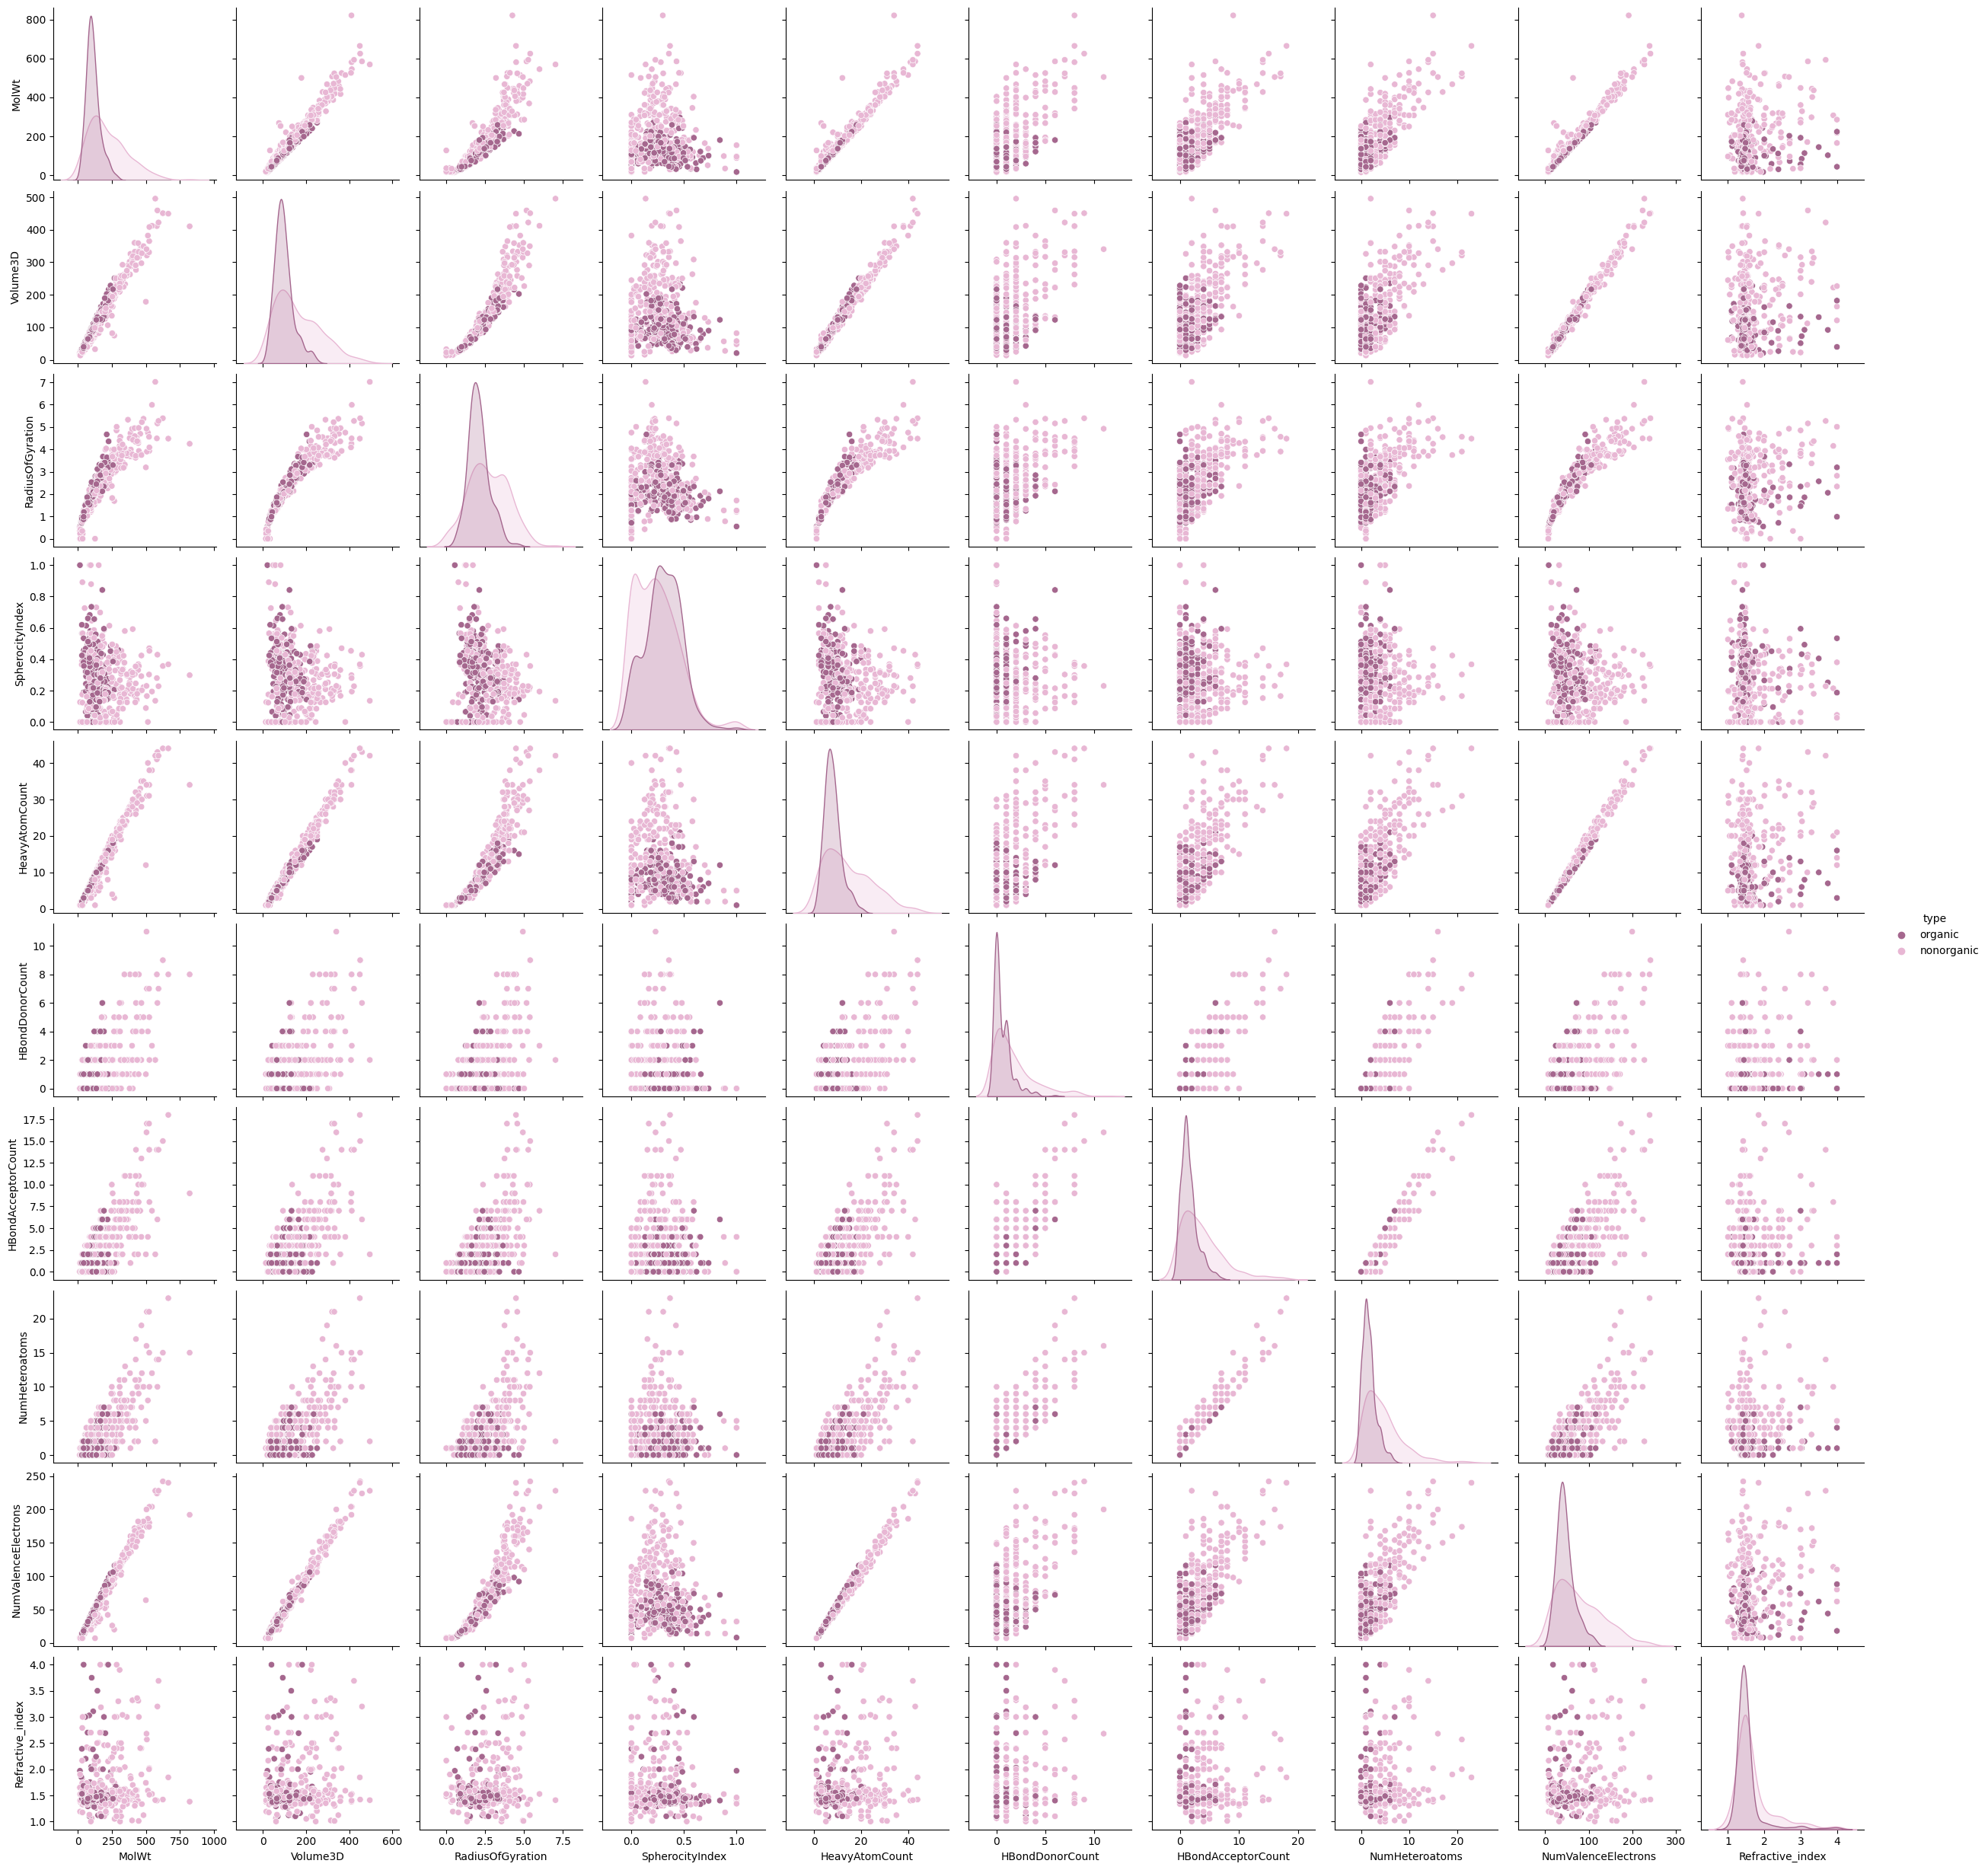

In [14]:
##Building pairplot to see how numerical variables depend on each other and what distribution they have
sns.pairplot(import_desc, hue = 'type', palette = [colors[0], colors[1]])


**Conclusions:**
- The molar mass has a linear relationship with the molar mass, the amount of heavy metals, and the number of valence electors, which is in good agreement with chemical laws
- Clustering is observed for the target value depending on organic/inorganic
- Clustering is also observed for many other cases
- The number of donors and acceptors also depends linearly on many variables
- The number of valence electrons has a linear dependence on the molar mass, volume, hydration radius and the number of heavy atoms
- Distributions are not normal in all cases
- In addition, interesting quadratic or exponential dependencies are observed for some parameters

### 1.4. Histogram / Boxplots
#### 1.4.1. MolWt


In [15]:
violin = df[['Name', 'SMILES', 'MolWt', 'Volume3D', 'RadiusOfGyration', 'SpherocityIndex','HeavyAtomCount', 'HBondDonorCount', 'HBondAcceptorCount', 'NumHeteroatoms', 'NumValenceElectrons', 'type', 'Refractive_index']]
#Delete lines from None
violin = violin.dropna()
violin

Name  \
4                  Dodecanol   
6                       PMMA   
63                      EtOH   
321             polyethylene   
325                  Glucose   
...                      ...   
3349                  Erlose   
3350               scoparone   
3352  2-(Methylamino)ethanol   
3356              d-limonene   
3360                     DHA   

                                                 SMILES    MolWt  Volume3D  \
4                                         CCCCCCCCCCCCO  186.339     171.6   
6                                        COC(=O)[C](C)C  101.125      86.1   
63                                                  CCO   46.069      41.5   
321                                                 C=C   28.054      31.7   
325            OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O  180.156     128.9   
...                                                 ...      ...       ...   
3349  OC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@H](O...  504.438     340.2   
3350                            COc1cc2OC(=O)C=Cc2cc1OC  206.197     158.2   
3352                                              CNCCO   75.111      64.2   
3356                                 CC(=C)C1CCC(=CC1)C  136.238     122.9   
3360      CC\C=C/C/C=C\C\C=C/C/C=C\C\C=C/C/C=C\CCC(O)=O  328.496     292.2   

      RadiusOfGyration  SpherocityIndex  HeavyAtomCount  HBondDonorCount  \
4             3.384694     2.794586e-01            13.0              1.0   
6             1.902565     1.504731e-01             7.0              0.0   
63            1.190703     4.306872e-01             3.0              1.0   
321           0.850246     3.291100e-16             2.0              0.0   
325           2.342298     5.537920e-01            12.0              5.0   
...                ...              ...             ...              ...   
3349          4.924302     2.298508e-01            34.0             11.0   
3350          2.924986     3.608912e-02            15.0              0.0   
3352          1.608362     5.123984e-01             5.0              2.0   
3356          2.443934     3.624929e-01            10.0              0.0   
3360          4.219231     3.334972e-01            24.0              1.0   

      HBondAcceptorCount  NumHeteroatoms  NumValenceElectrons        type  \
4                    1.0               1                   80     organic   
6                    2.0               2                   41     organic   
63                   1.0               1                   20     organic   
321                  0.0               0                   12     organic   
325                  6.0               6                   72  nonorganic   
...                  ...             ...                  ...         ...   
3349                16.0              16                  200  nonorganic   
3350                 4.0               4                   78  nonorganic   
3352                 2.0               2                   32     organic   
3356                 0.0               0                   56     organic   
3360                 2.0               2                  132  nonorganic   

      Refractive_index  
4               1.4355  
6               1.4900  
63              1.3610  
321             1.4300  
325             1.3460  
...                ...  
3349            2.6800  
3350            1.1900  
3352            1.4390  
3356            1.4730  
3360            3.0400  

[514 rows x 13 columns]

Text(0, 0.5, 'Molar mass')

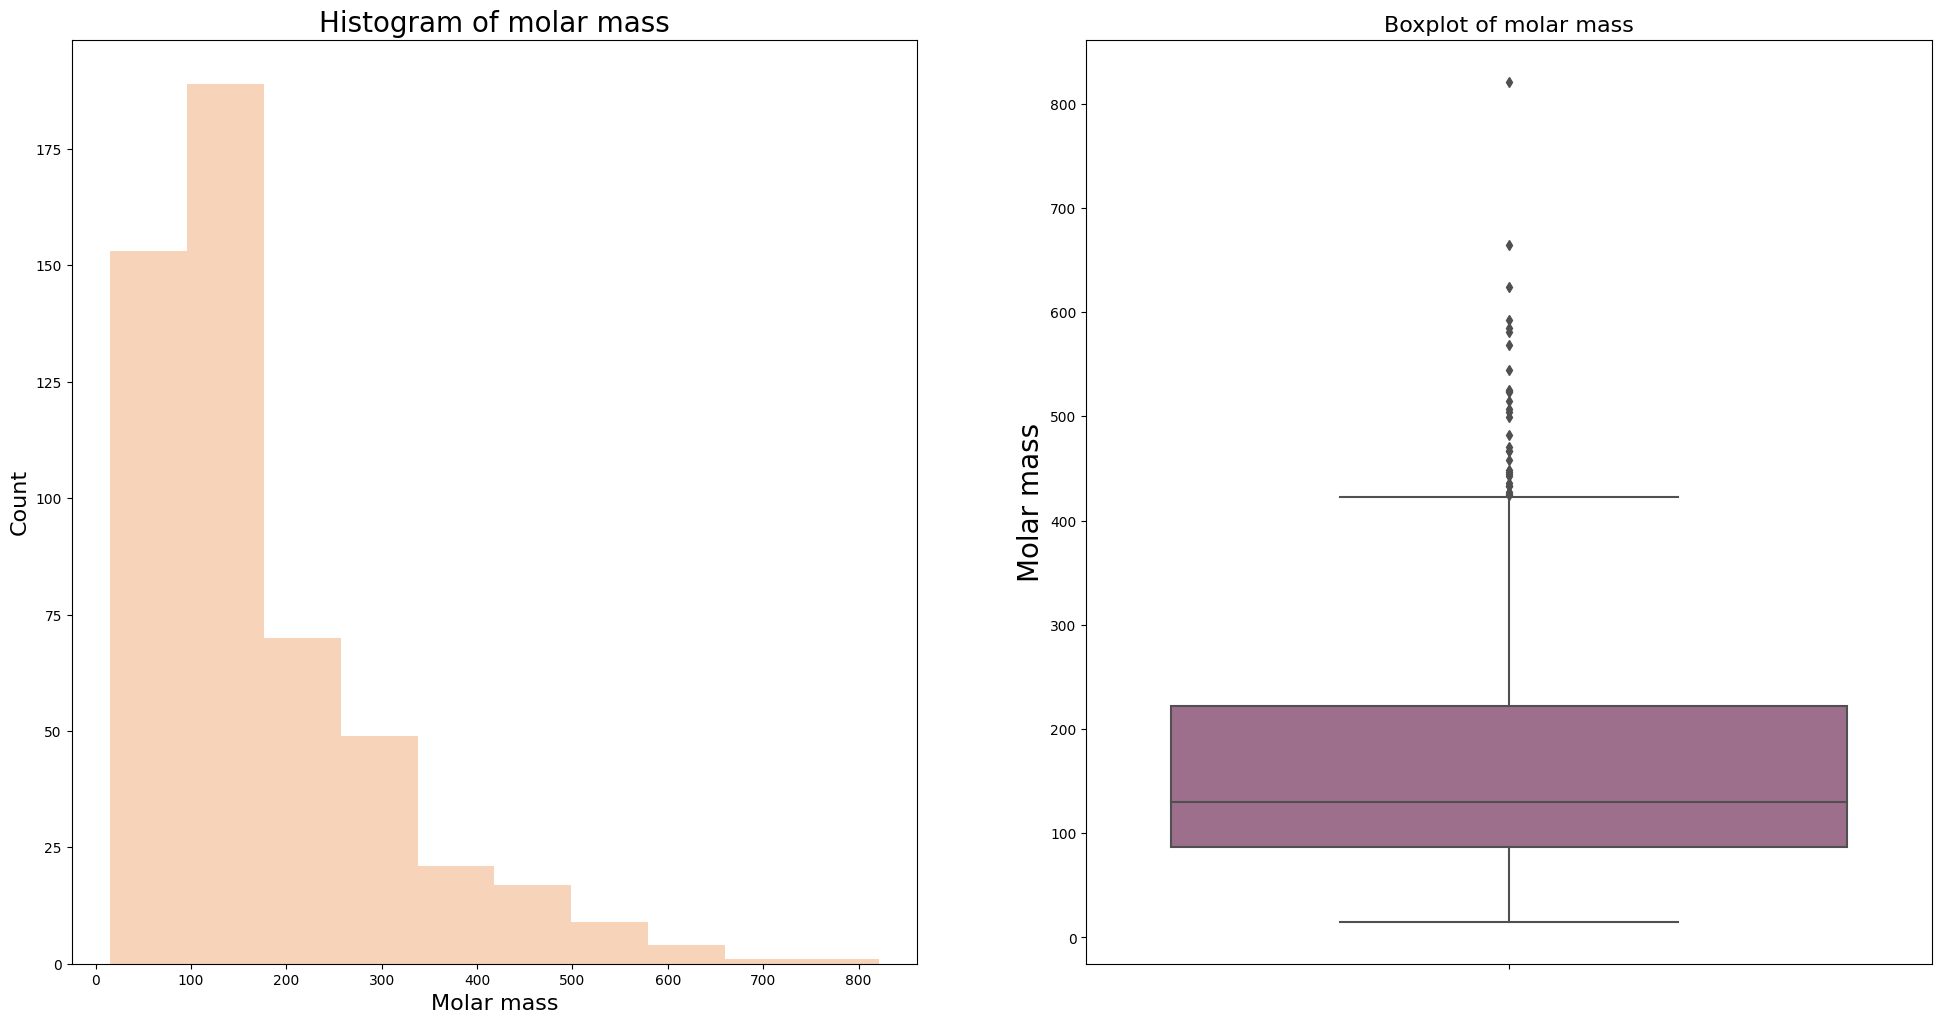

In [16]:
fig_coating, ax_coating = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12))
ax_coating[0].hist(violin['MolWt'], color = '#F7D3BA')
ax_coating[0].set_title('Histogram of molar mass', fontsize=20)
ax_coating[0].set_xlabel('Molar mass', fontsize=16)
ax_coating[0].set_ylabel('Count', fontsize=16)

ax_coating[1]= sns.boxplot(y = violin['MolWt'], palette = colors)
ax_coating[1].set_title('Boxplot of molar mass', fontsize=16)
ax_coating[1].set_ylabel('Molar mass', fontsize=20)


#### 1.4.2. Iimport desc

Text(0, 0.5, 'Refractive_index')

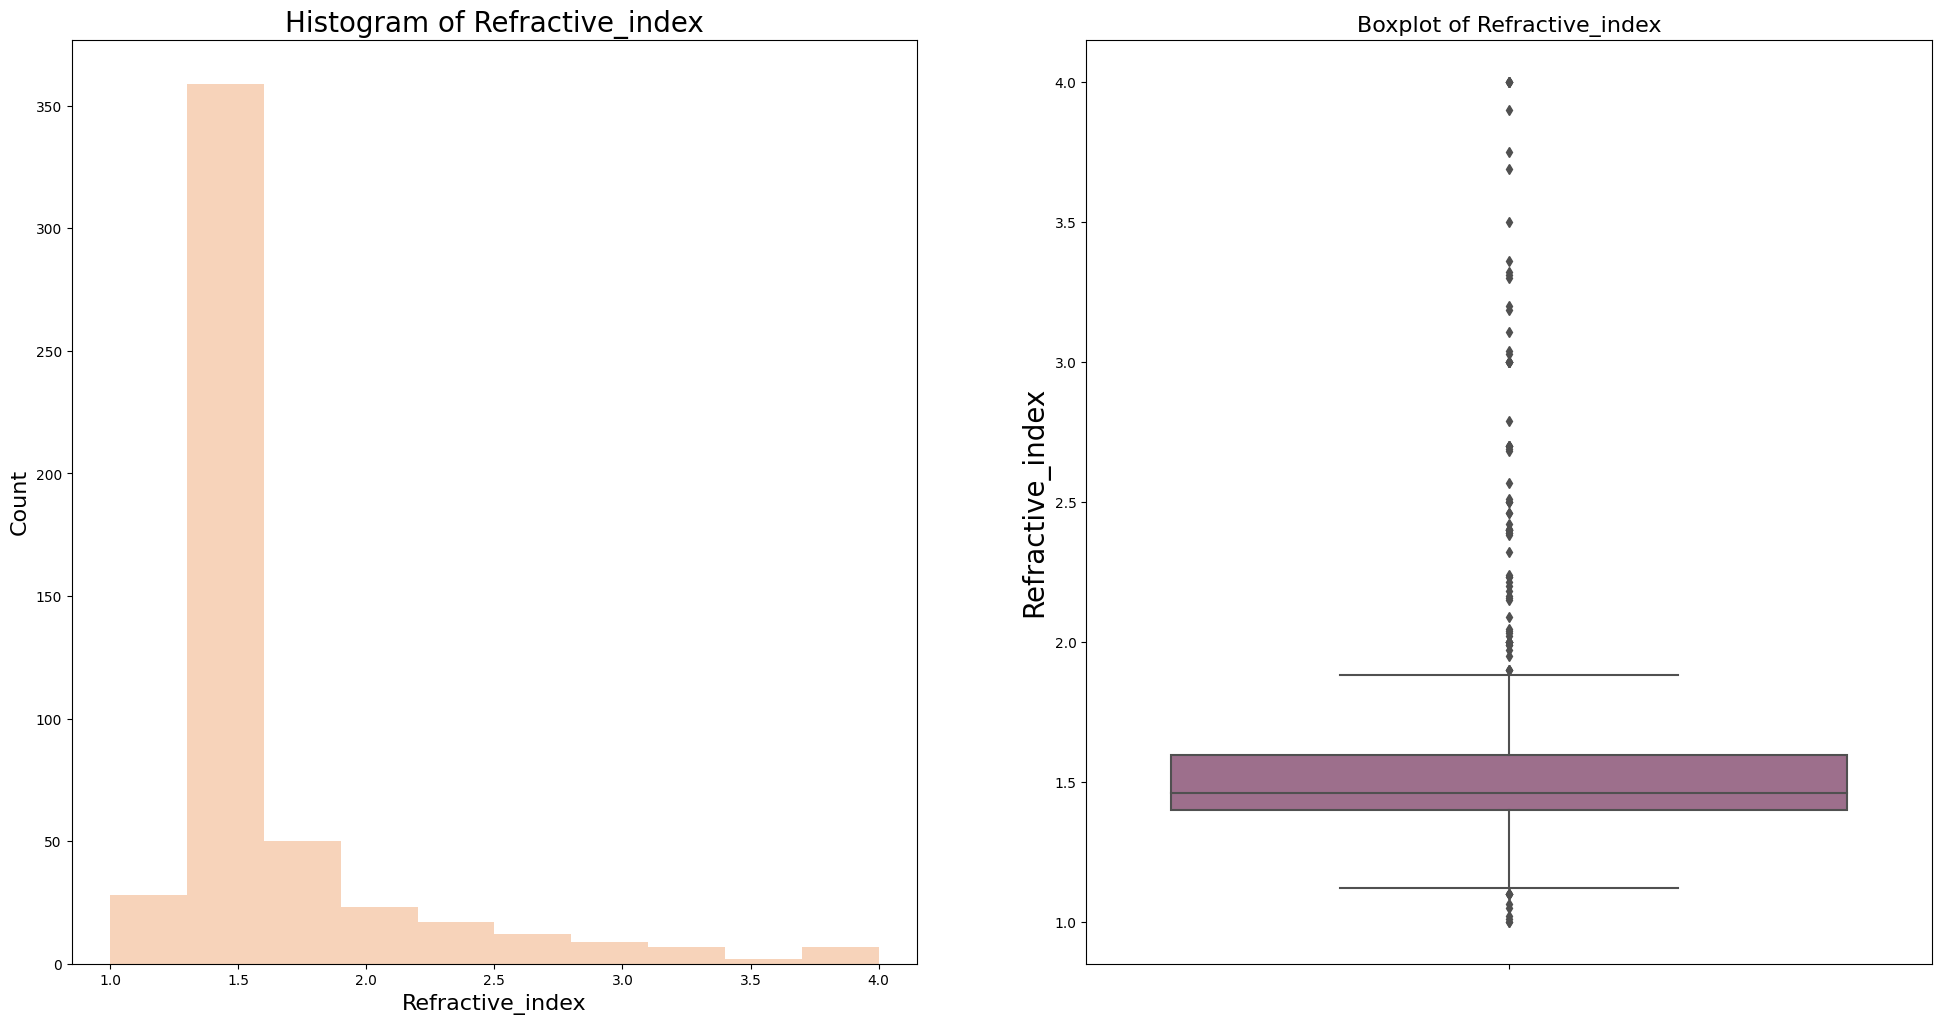

In [17]:
fig_coating, ax_coating = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12))
ax_coating[0].hist(import_desc['Refractive_index'], color = '#F7D3BA')
ax_coating[0].set_title('Histogram of Refractive_index', fontsize=20)
ax_coating[0].set_xlabel('Refractive_index', fontsize=16)
ax_coating[0].set_ylabel('Count', fontsize=16)

ax_coating[1]= sns.boxplot(y = import_desc['Refractive_index'], palette = colors)
ax_coating[1].set_title('Boxplot of Refractive_index', fontsize=16)
ax_coating[1].set_ylabel('Refractive_index', fontsize=20)

#### 1.4.3. Radius Of Gyration

Text(0, 0.5, 'RadiusOfGyration')

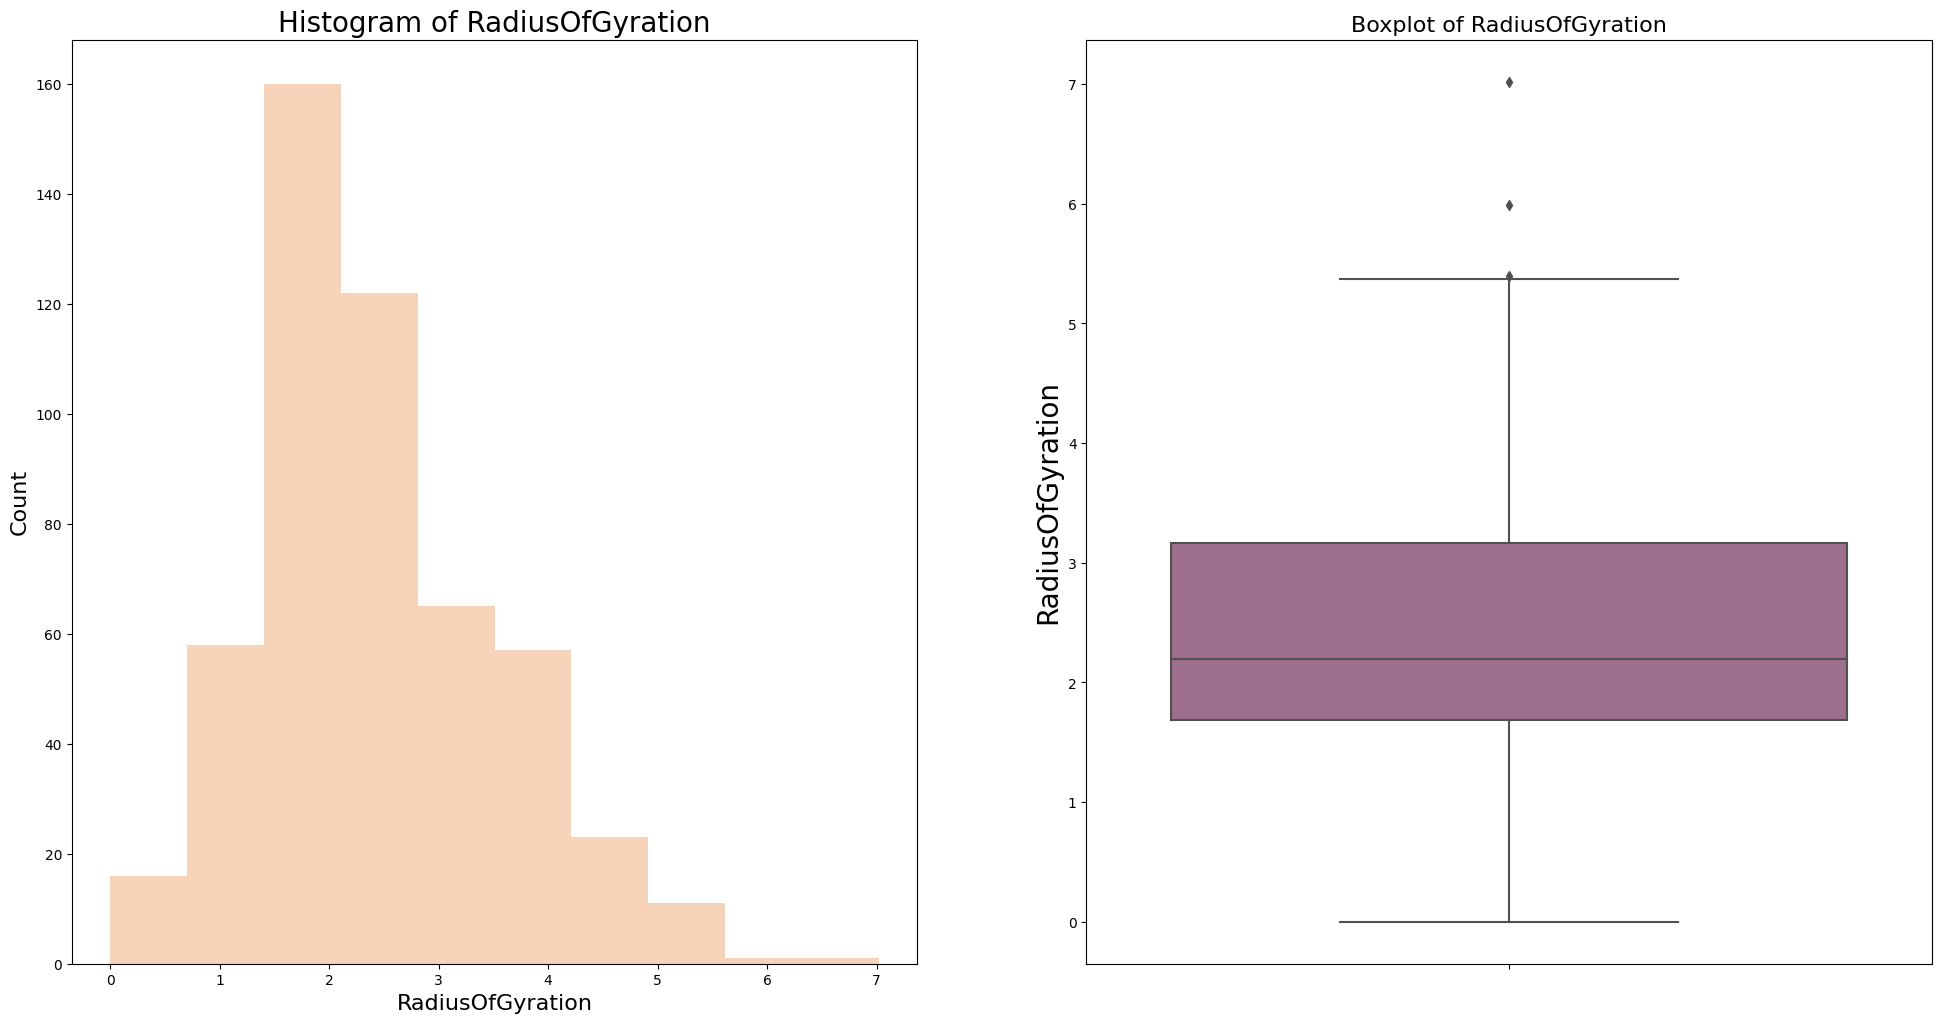

In [18]:
fig_coating, ax_coating = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12))
ax_coating[0].hist(import_desc['RadiusOfGyration'], color = '#F7D3BA')
ax_coating[0].set_title('Histogram of RadiusOfGyration', fontsize=20)
ax_coating[0].set_xlabel('RadiusOfGyration', fontsize=16)
ax_coating[0].set_ylabel('Count', fontsize=16)

ax_coating[1]= sns.boxplot(y = import_desc['RadiusOfGyration'], palette = colors)
ax_coating[1].set_title('Boxplot of RadiusOfGyration', fontsize=16)
ax_coating[1].set_ylabel('RadiusOfGyration', fontsize=20)

**Conclusions:**

- In all cases, the quantities do not have a normal distribution
- In each of the cases there are outliers


### 1.5. Interactive plot
Also, for a more detailed study, we will consider the dependence of the refractive index on the molar mass with the condition of the sphericity of the molecule, these parameters were chosen because they describe the molecule quite fully and do not depend linearly on each other

In [19]:
#data = violin.query('year==2002')
fig = px.scatter(violin, x="MolWt", y="Refractive_index", color='RadiusOfGyration', size_max=60)
 # build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



**Conclusions:**

- The molecular weight is related to the amount of radius of gyration, which is logical
- The refractive index is practically independent of the molecular weight


## 2. Statistical tests
### 2.1. Categorical variables
#### 2.1.1. Organic/Inorganic
Let's check whether organic and inorganic molecules have the same distribution

There are two types of statistical tests: parametric and nonparametric, for our data we chose parametric tests.
 
Since we want to determine how much the value of the refractive index depends on the type of substance (organic or not), we can use the t-test. Its main advantages are sensitivity, because the t-test is sensitive to small differences between groups, which makes it a useful tool for detecting even small differences between groups, which is what we need. It is also easy to interpret, has high statistical power, and is easy to understand and use.

In [20]:
org = df[(df.type == 'organic')]['Refractive_index']
inorg = df[(df.type == 'nonorganic')]['Refractive_index']
#tt
stat, p = ttest_ind(org, inorg)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-5.261, p=-5.261
Probably different distributions


 - The distributions are really different, so it can be assumed that the type of molecule affects the refractive index

#### 2.1.2. Measurement method
Let's check whether different Measurement methods have the same distribution - ANOVA tests

Since we have more than 2 groups according to the method of measurement, therefore, we chose the ANOVA test to determine the difference between the mean values of these groups, which will allow us to determine whether the chosen method of measurement affects the obtained refractive index. 

In [21]:
data1 = df[(df.measurement_method == 'el_mylogic')]['Refractive_index']
data2 = df[(df.measurement_method == 'el_cde_tables')]['Refractive_index']
data3 = df[(df.measurement_method == 'el_cde_text')]['Refractive_index']
stat, p = f_oneway(data1, data2, data3)
print('stat={0:.3g}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=8.69, p=8.69
Probably different distributions


It is also possible that the type of measurement affects the target value

### 2.2. Numerical variables
#### 2.2.1. Normality Tests
H0: the sample has a Gaussian distribution

H1: the sample does not have a Gaussian distribution

Shapiro-Wilk Test

In [22]:
from scipy.stats import shapiro
data = df.loc[:,'Refractive_index']
stat, p = shapiro(data)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.712, p=0.712
Probably not Gaussian


Probably, as mentioned above, our distribution is not normal

#### 2.2.2. Chi-square test
 - The Chi-square test for the independence of two attributes is used to check whether the two characteristics are independent. It is used to determine whether a categorical outcome variable (Y) is related or associated with another categorical predictor variable (X)

 - Earlier we assumed the dependence of the radius of gyration and the refractive index, we will test this hypothesis

In [23]:
#Extract required columns, ideally it should be two columns at a time
data_interim=violin[['Refractive_index', 'RadiusOfGyration']]
#Create a cross tab which is a contigency table
data_cont=pd.crosstab(data_interim['Refractive_index'], data_interim['RadiusOfGyration'])
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_cont)
#interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:

    print('Dependent (reject H0)')

else:
    print('Independent (H0 holds true)')

p value is 0.09181832688171108
Independent (H0 holds true)


As we can see, these values are independent, our hypothesis has not been confirmed

## 3. Correlation coefficients
### 3.1. Correlation coefficients

In [24]:
#Calculate the correlation coefficients using Spearman
df_corr = df.corr(method='spearman')
df_corr_tr = df_corr.abs().where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
df_corr_tr


C:\Users\iyale\AppData\Local\Temp\ipykernel_8224\947251862.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\iyale\AppData\Local\Temp\ipykernel_8224\947251862.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



measurement_error  MaxEStateIndex  MinEStateIndex  \
measurement_error                NaN         0.02801        0.050883   
MaxEStateIndex                   NaN             NaN        0.629694   
MinEStateIndex                   NaN             NaN             NaN   
MaxAbsEStateIndex                NaN             NaN             NaN   
MinAbsEStateIndex                NaN             NaN             NaN   
...                              ...             ...             ...   
WPol                             NaN             NaN             NaN   
Zagreb1                          NaN             NaN             NaN   
Zagreb2                          NaN             NaN             NaN   
mZagreb2                         NaN             NaN             NaN   
Refractive_index                 NaN             NaN             NaN   

                   MaxAbsEStateIndex  MinAbsEStateIndex       qed     MolWt  \
measurement_error           0.028010           0.069408  0.032147  0.112284   
MaxEStateIndex              1.000000           0.150073  0.170200  0.566709   
MinEStateIndex              0.629694           0.449078  0.060423  0.536239   
MaxAbsEStateIndex                NaN           0.150073  0.170200  0.566709   
MinAbsEStateIndex                NaN                NaN  0.051763  0.086881   
...                              ...                ...       ...       ...   
WPol                             NaN                NaN       NaN       NaN   
Zagreb1                          NaN                NaN       NaN       NaN   
Zagreb2                          NaN                NaN       NaN       NaN   
mZagreb2                         NaN                NaN       NaN       NaN   
Refractive_index                 NaN                NaN       NaN       NaN   

                   HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  ...  \
measurement_error        0.115617    0.112150             0.075063  ...   
MaxEStateIndex           0.556075    0.568426             0.747250  ...   
MinEStateIndex           0.501110    0.537844             0.762008  ...   
MaxAbsEStateIndex        0.556075    0.568426             0.747250  ...   
MinAbsEStateIndex        0.118348    0.085178             0.152802  ...   
...                           ...         ...                  ...  ...   
WPol                          NaN         NaN                  NaN  ...   
Zagreb1                       NaN         NaN                  NaN  ...   
Zagreb2                       NaN         NaN                  NaN  ...   
mZagreb2                      NaN         NaN                  NaN  ...   
Refractive_index              NaN         NaN                  NaN  ...   

                      SRW10    TSRW10        MW       AMW     WPath      WPol  \
measurement_error  0.070901  0.078875  0.112150  0.050953  0.042935  0.076348   
MaxEStateIndex     0.748440  0.746221  0.568426  0.111997  0.447426  0.730756   
MinEStateIndex     0.657791  0.673771  0.537844  0.424210  0.439331  0.641314   
MaxAbsEStateIndex  0.748440  0.746221  0.568426  0.111997  0.447426  0.730756   
MinAbsEStateIndex  0.094881  0.087555  0.085178  0.500352  0.204654  0.109717   
...                     ...       ...       ...       ...       ...       ...   
WPol                    NaN       NaN       NaN       NaN       NaN       NaN   
Zagreb1                 NaN       NaN       NaN       NaN       NaN       NaN   
Zagreb2                 NaN       NaN       NaN       NaN       NaN       NaN   
mZagreb2                NaN       NaN       NaN       NaN       NaN       NaN   
Refractive_index        NaN       NaN       NaN       NaN       NaN       NaN   

                    Zagreb1   Zagreb2  mZagreb2  Refractive_index  
measurement_error  0.072872  0.072220  0.069764          0.084352  
MaxEStateIndex     0.761397  0.756916  0.756183          0.034157  
MinEStateIndex     0.699095  0.681831  0.707755          0.169563  
MaxAbsEStateIndex  0.761397  0.756916  0.756183          0.

Since the heatmap would have turned out to be very large, it was decided not to build it, it can also be noticed that many variables correlate strongly with each other

### 3.2. Investigation of multicollinearity

- To study multicollinearity in data, various statistical methods can be used, such as IF (variable inflation coefficient) and correlation analysis.

- We use the variance_inflation_factor function from Statsmodels to determine the VIF values for each predictor. "VIF".

- We output the results in the form of a table, where its VIF value is indicated for each predictor. If a predictor has a VIF value significantly greater than 1, this may be a sign of multicollinearity. In this case, it is necessary to conduct additional analysis and decide which predictors should be excluded from the model.

- We will investigate multicollinearity on 'MolWt', 'Volume 3D', 'SpherocityIndex', 'HeavyAtomCount', 'NumHeteroatoms', 'NumValenceElectrons', 'Refractive_index'

          VIF              feature
0   98.220357                MolWt
1  478.085130             Volume3D
2    2.466399      SpherocityIndex
3  298.164828       HeavyAtomCount
4   11.051399       NumHeteroatoms
5  602.273758  NumValenceElectrons


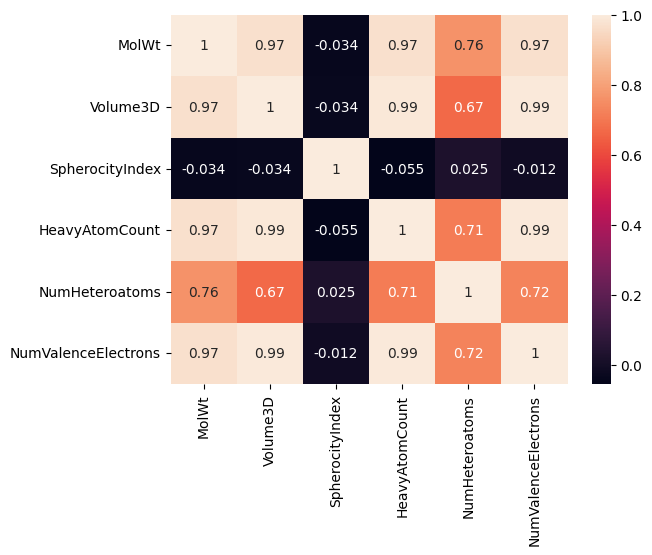

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# selection of predictors and target variable
X = violin[['MolWt', 'Volume3D', 'SpherocityIndex', 'HeavyAtomCount', 'NumHeteroatoms', 'NumValenceElectrons']]
y = violin['Refractive_index']

# construction of the correlation matrix
corr = X.corr()

# visualization of the correlation matrix
sns.heatmap(corr, annot=True)

# determination of VIF (variation inflation factor) values for each predictor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns

# вывод результатов
print(vif)

Высокие значения VIF, а также выскоие значения корреляции могут указывать на мультиколлинеарность

## 4. Dimension reduction
### 4.1. Linear (ICA)
On statistical tests, we checked that we have non-Gaussian data, so we choose the ICA (Independent Component Analysis) method


In [26]:
# Fill in the gaps with kNN
#using the kNN method to fill in the missing data
# Data
data = df.select_dtypes(include = ['float', 'int'])

# Create a KNNImputer object with the number of nearest neighbors equal to 5
imputer = KNNImputer(n_neighbors=5)

# Fill in the missing values in the dataset
data_imputed = imputer.fit_transform(data)

# Convert a numpy array to a pandas dataframe
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

data_imputed.shape


(774, 810)

In [27]:
# Let's normalize the data
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(data_imputed)
df_norm = pd.DataFrame(df_norm, columns=data_imputed.columns)


**Choosing the number of components using cumulative variance**

In [28]:
#ICA

# Data
X, Y = df_norm.drop(["Refractive_index"], axis=1), df_norm[["Refractive_index"]].values.flatten()

#Import required libraries
from sklearn.decomposition import FastICA

# perform ICA
ica = FastICA(n_components=20)
ICA_x = ica.fit_transform(X)

# calculate explained variance for components
ica_explained_variance = np.var(ICA_x, axis=0)

# calculate cumulative variance
explained_variance_ratio = ica_explained_variance / np.sum(ica_explained_variance)
y = np.cumsum(explained_variance_ratio)

# calculate principal components
princ_comp = np.arange(1, y.shape[0]+1, step=1)

c:\Users\iyale\anaconda3\envs\myenv\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



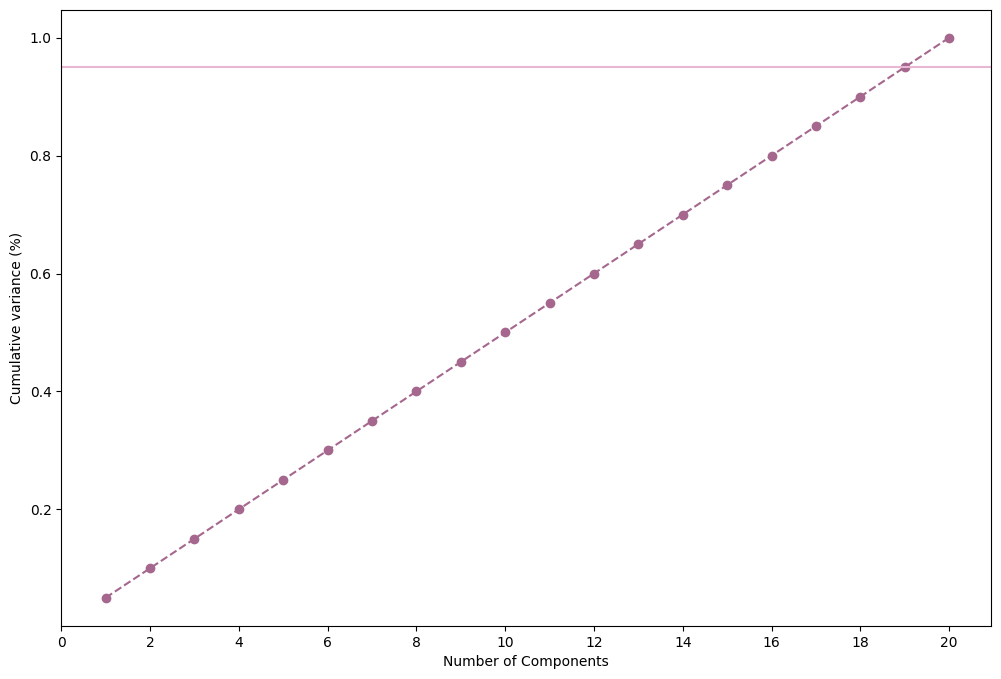

In [29]:
# plot results for cumulative variance
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(princ_comp, y, marker='o', linestyle='--', color=colors[0])
plt.xlabel('Number of Components')
plt.axhline(y=0.95, color=colors[1], linestyle='-')
plt.xticks(np.arange(0, 21, step=2))
plt.ylabel('Cumulative variance (%)')
plt.show()

In ICA, there is no special criterion, as in the case of PCA, for choosing the number of components — it is selected experimentally. As we can see from the graph, the methods that work for PC are not suitable for ICA. Therefore, we have selected 20 components for our task.

**Explain the components**

In [30]:
#Combine the original data (X_pubchem) and first three PCs
df_ica = pd.DataFrame(data = ICA_x, columns = [f'ICA{i}' for i in range(1,21)])
df_col = pd.concat([df_ica[['ICA4', 'ICA5', 'ICA6']], pd.DataFrame(X[['MolWt', 'Volume3D', 'SpherocityIndex', 'HeavyAtomCount', 'NumHeteroatoms', 'NumValenceElectrons']], columns=X[['MolWt', 'Volume3D', 'SpherocityIndex', 'HeavyAtomCount', 'NumHeteroatoms', 'NumValenceElectrons']].columns)], axis=1)
df_col

ICA4      ICA5      ICA6     MolWt  Volume3D  SpherocityIndex  \
0    0.009381 -0.017814 -0.014185  0.069256  0.296372     5.121703e-16   
1   -0.009521 -0.006426 -0.004318  0.070404  0.328219     2.794586e-01   
2   -0.010547  0.013815 -0.004563  0.038033  0.150943     1.504731e-01   
3    0.014588 -0.001238  0.002595  0.017118  0.058470     4.306872e-01   
4   -0.014117 -0.026481 -0.021624  0.011818  0.042795     9.999913e-01   
..        ...       ...       ...       ...       ...              ...   
769 -0.004150  0.001757  0.008485  0.057345  0.135808     3.120628e-16   
770 -0.038270 -0.007397 -0.012575  0.107092  0.195480     5.780427e-01   
771 -0.001190 -0.008850 -0.000410  0.069252  0.293220     1.569461e-01   
772 -0.009358 -0.024466 -0.006753  0.124407  0.578271     3.334972e-01   
773 -0.040862  0.005778  0.011307  0.059982  0.128509     3.120628e-16   

     HeavyAtomCount  NumHeteroatoms  NumValenceElectrons  
0          0.306977        0.063830             0.023772  
1          0.279070        0.021277             0.125198  
2          0.139535        0.042553             0.063391  
3          0.046512        0.021277             0.030111  
4          0.032558        0.021277             0.011094  
..              ...             ...                  ...  
769        0.083721        0.021277             0.009509  
770        0.204651        0.170213             0.087163  
771        0.311628        0.127660             0.049128  
772        0.534884        0.042553             0.207607  
773        0.069767        0.042553             0.011094  

[774 rows x 9 columns]

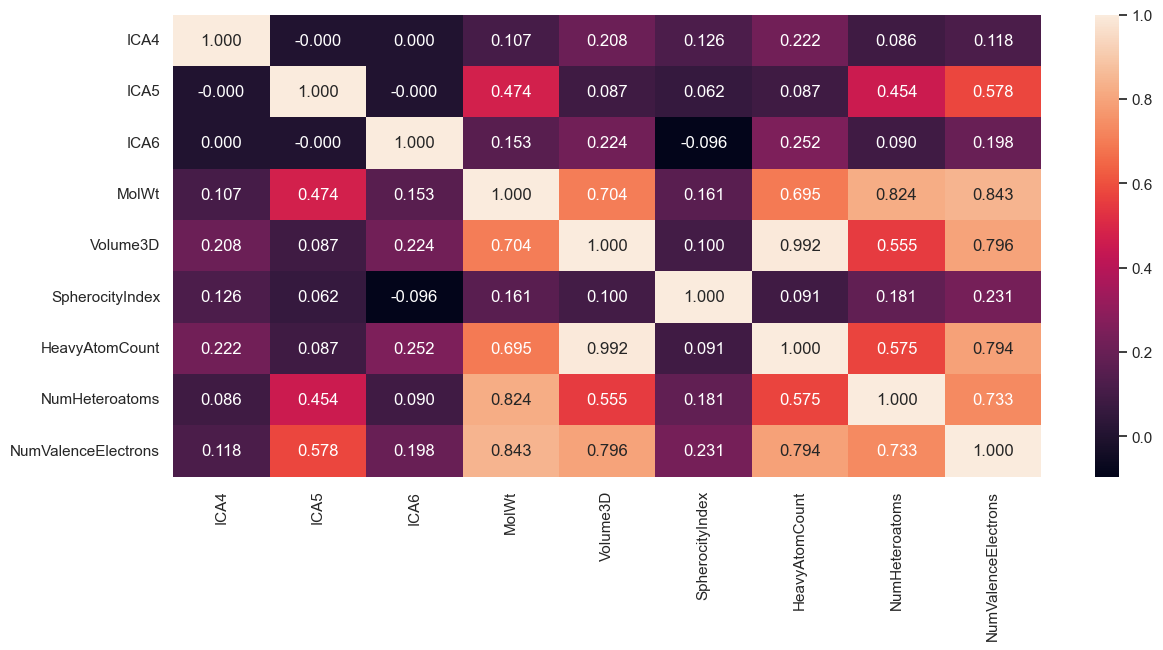

<Figure size 2800x1800 with 0 Axes>

In [31]:
#Compute the correlations between the original data and PCs
corMatrix = pd.DataFrame.corr(df_col)

#Plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corMatrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()

**Conclusions:**
- As we can see, there is a correlation between IC A4 and the main physical parameters of the molecule
- IC5 and IC6 are related to 3D descriptors and can explain the sphericity of the molecule

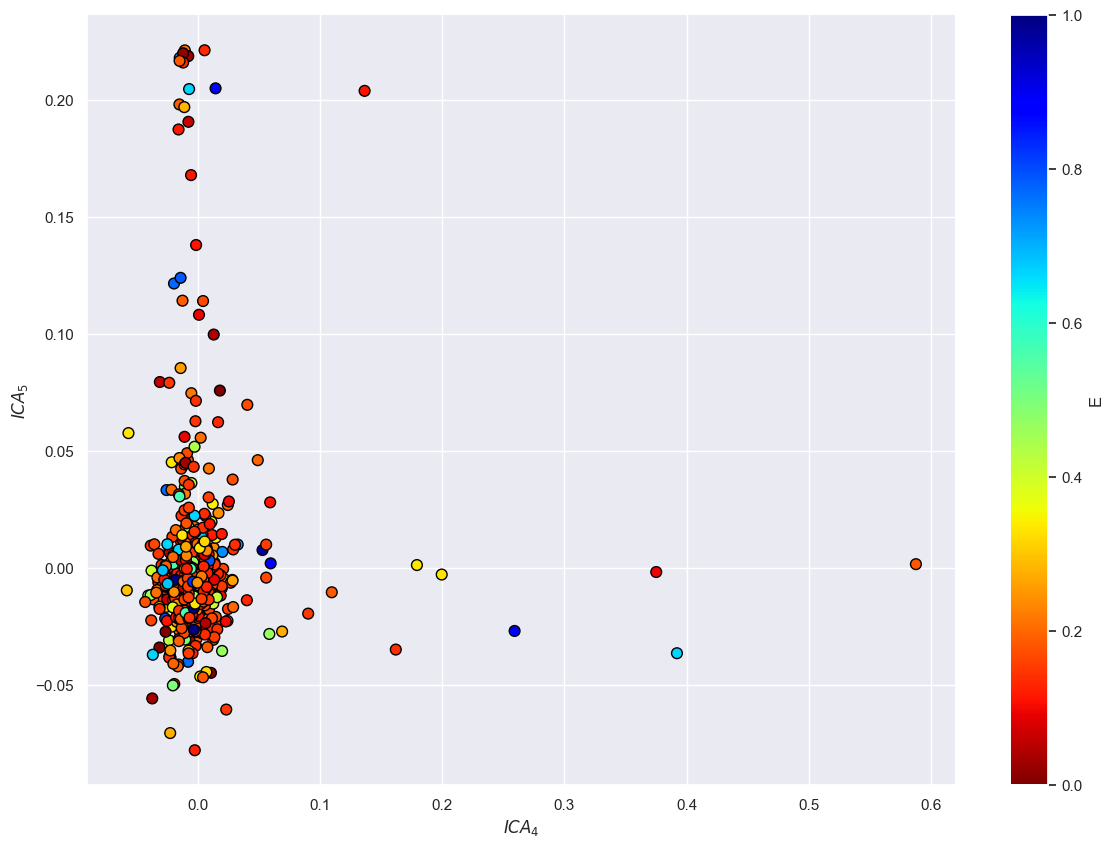

In [32]:
#We will also build a graph showing how the original parameters change into new ones, for this we will select new descriptors ICA4 and ICA5

#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(ICA_x[:, 4],ICA_x[:, 5], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$ICA_4$')
plt.ylabel(r'$ICA_5$')
sns.despine()
plt.show()

### 4.2. Non-linear (Uniform Manifold Approximation and Projection)
We use this method, because:
More interpretable than other dimensionality reduction techniques


Works by constructing a graph representation of the data, where each data point is a node in the graph, and edges are drawn between nodes that are close to each other in high-dimensional space. UMAP then constructs a low-dimensional space by optimizing a cost function that balances the preservation of the local and global structure of the data.

Let's consider various UMAP parameters and plot graphs for each of the parameters

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Data
X, y = df_norm.drop(["Refractive_index"], axis=1), df_norm[["Refractive_index"]].values.flatten()

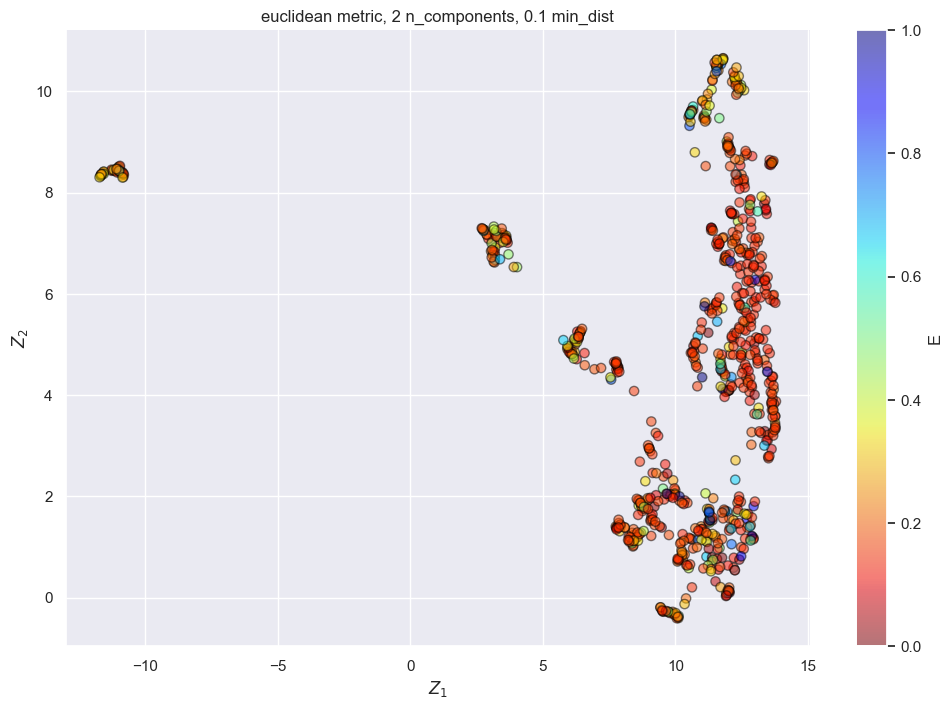

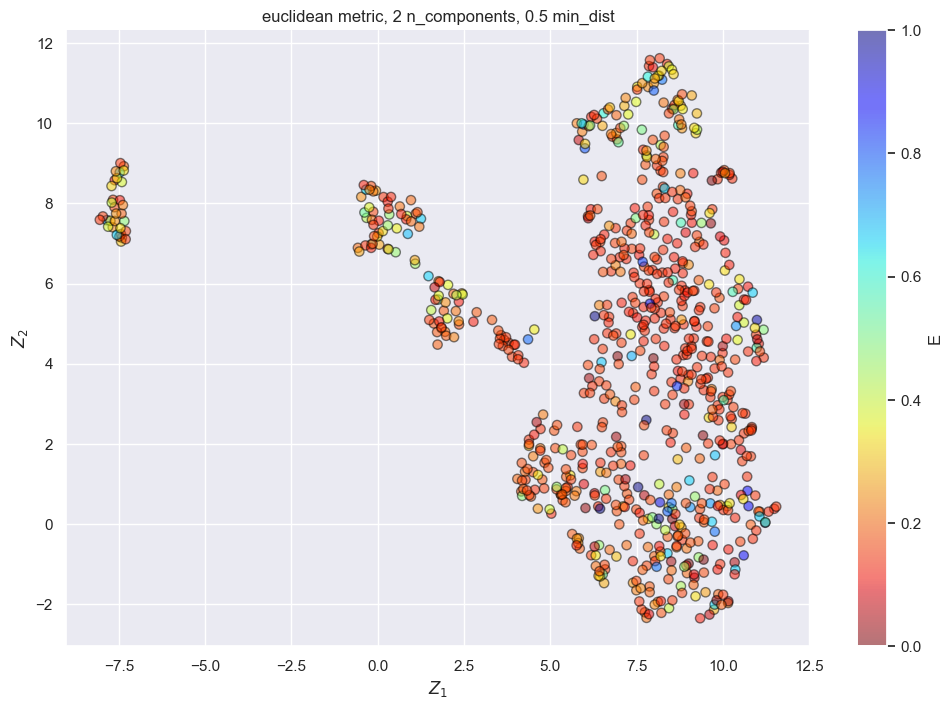

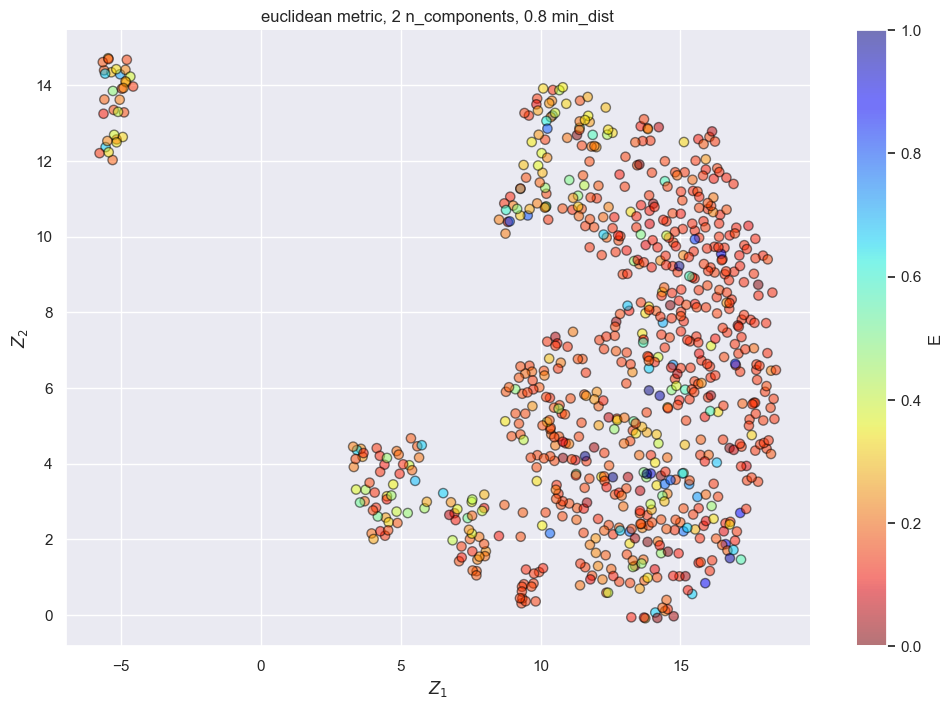

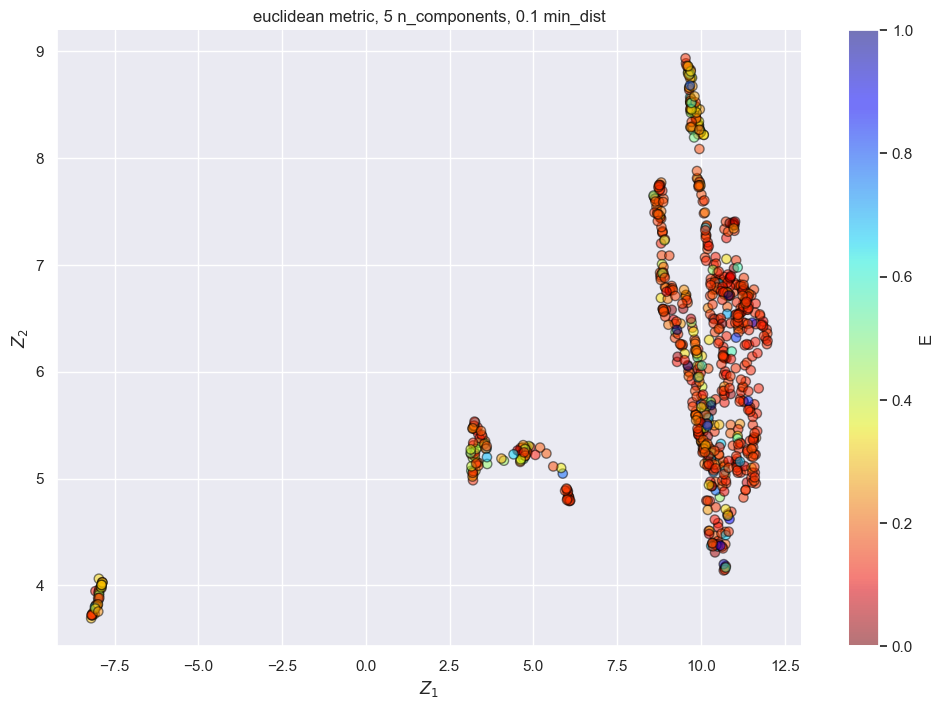

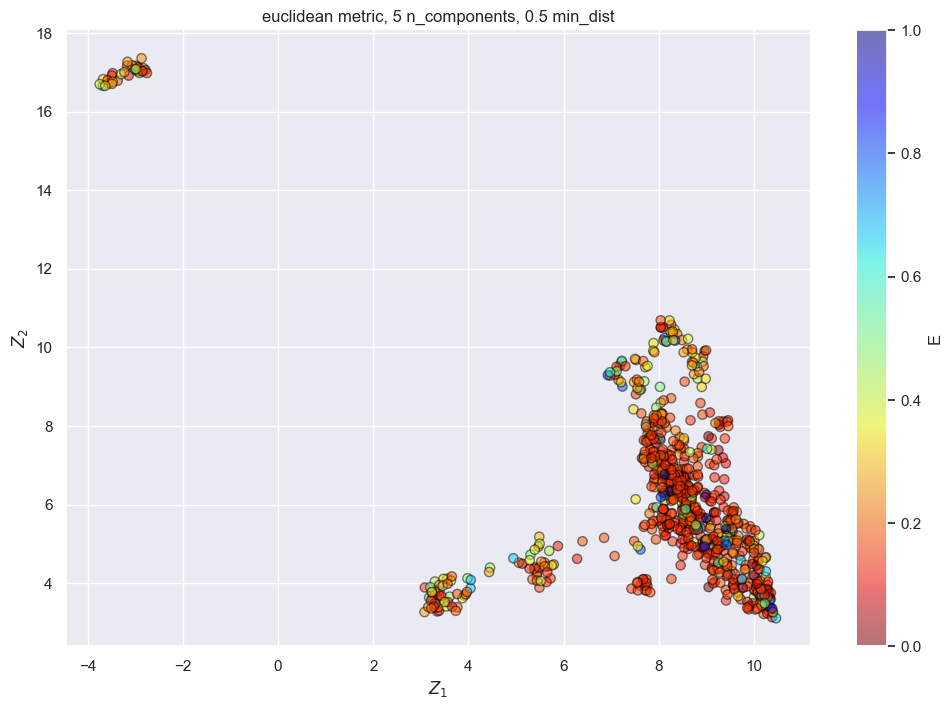

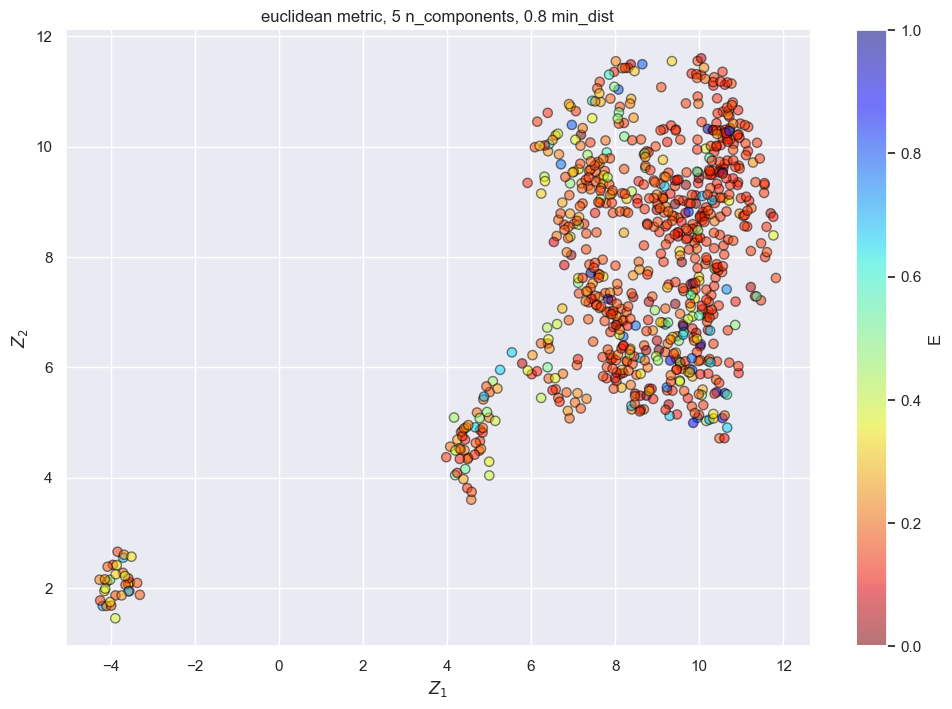

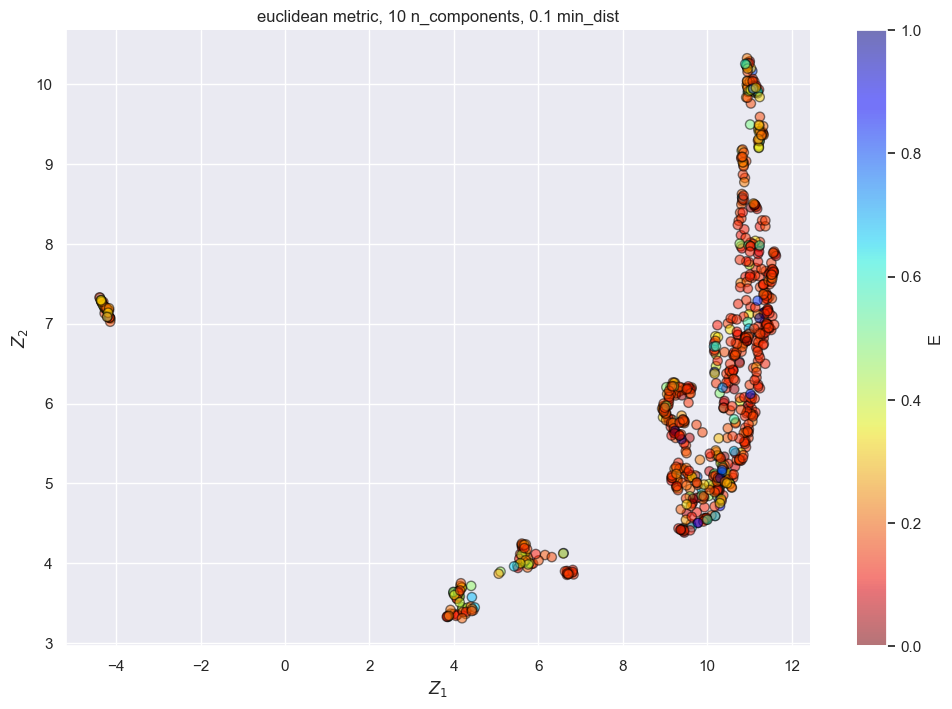

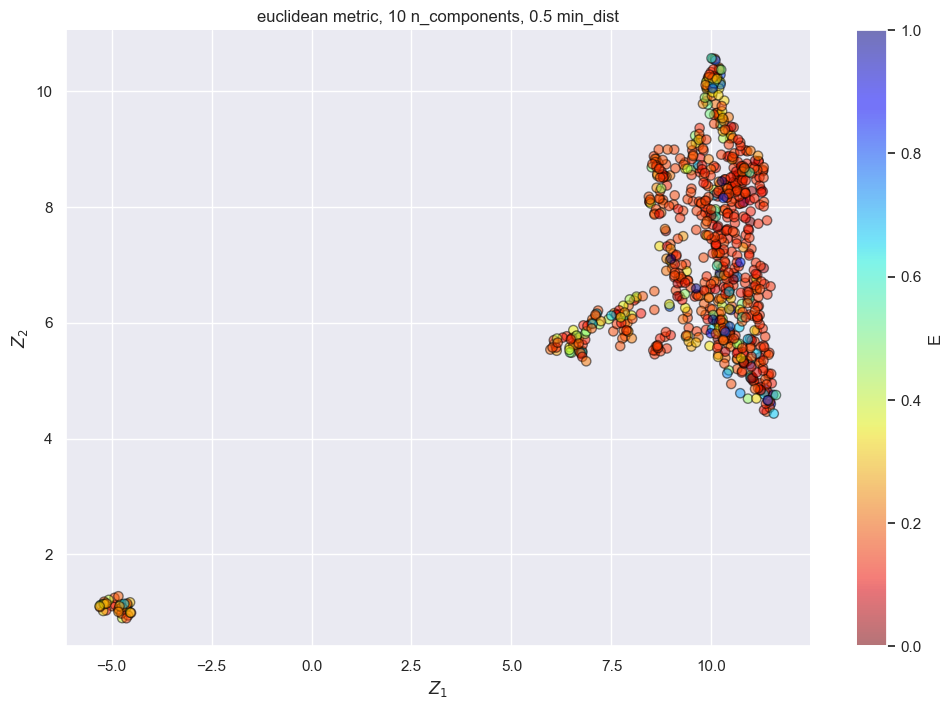

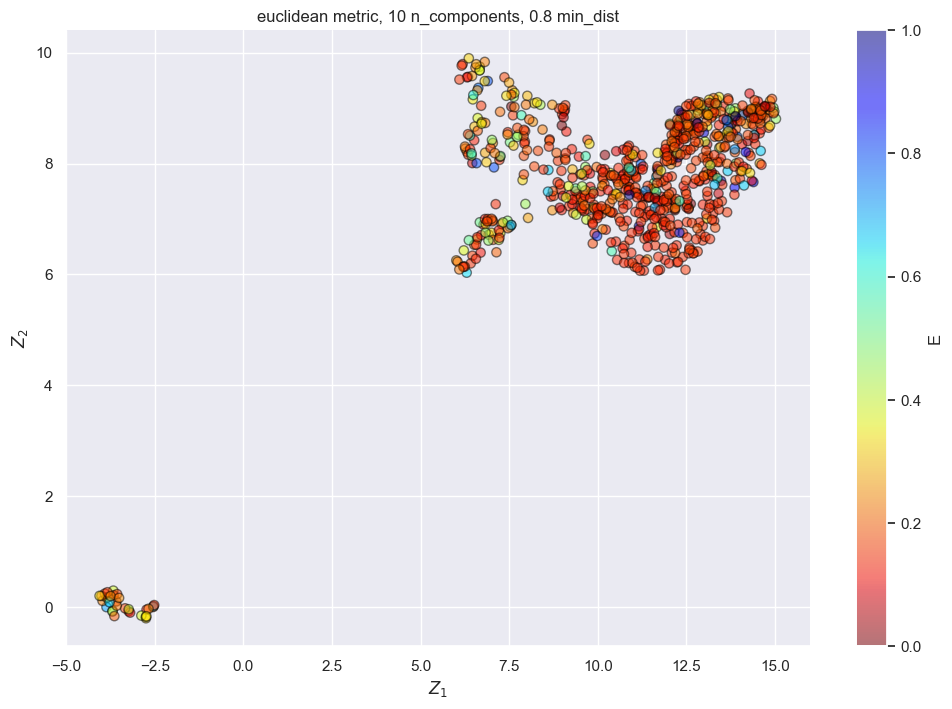

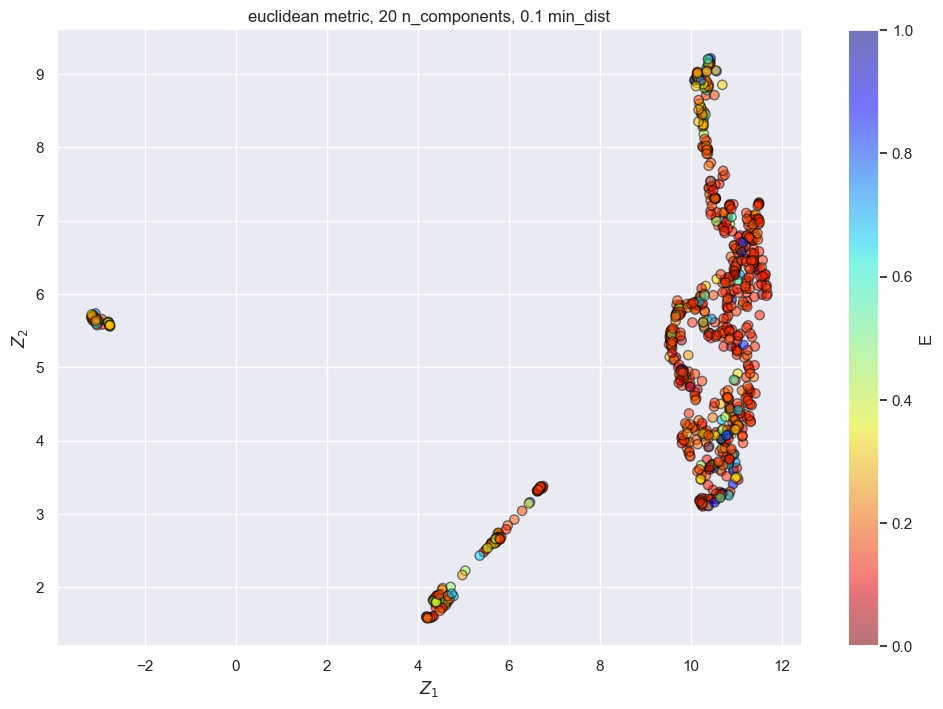

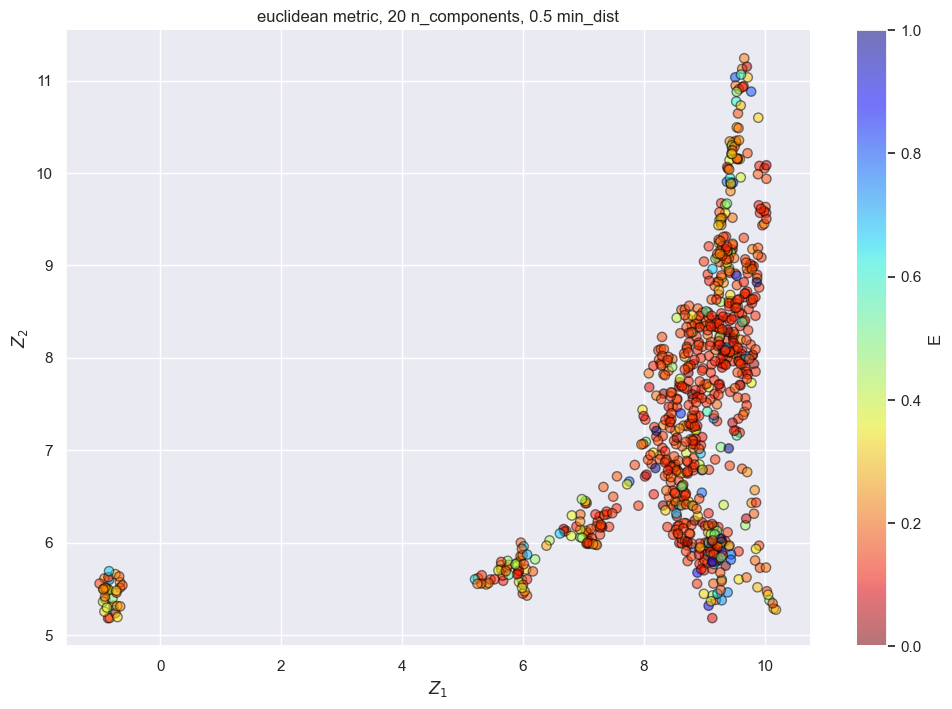

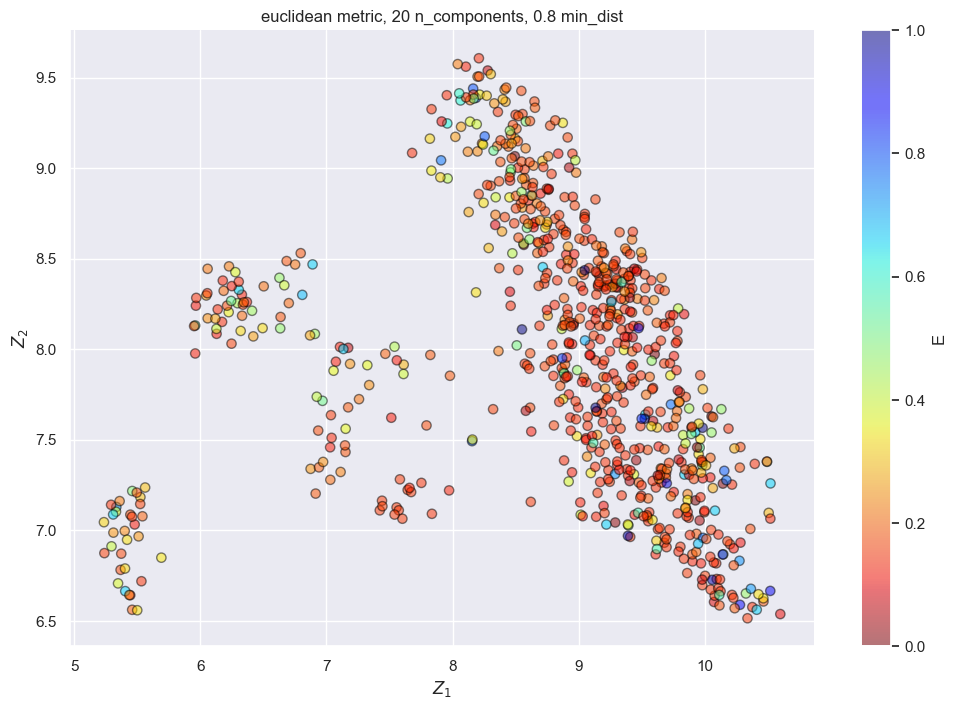

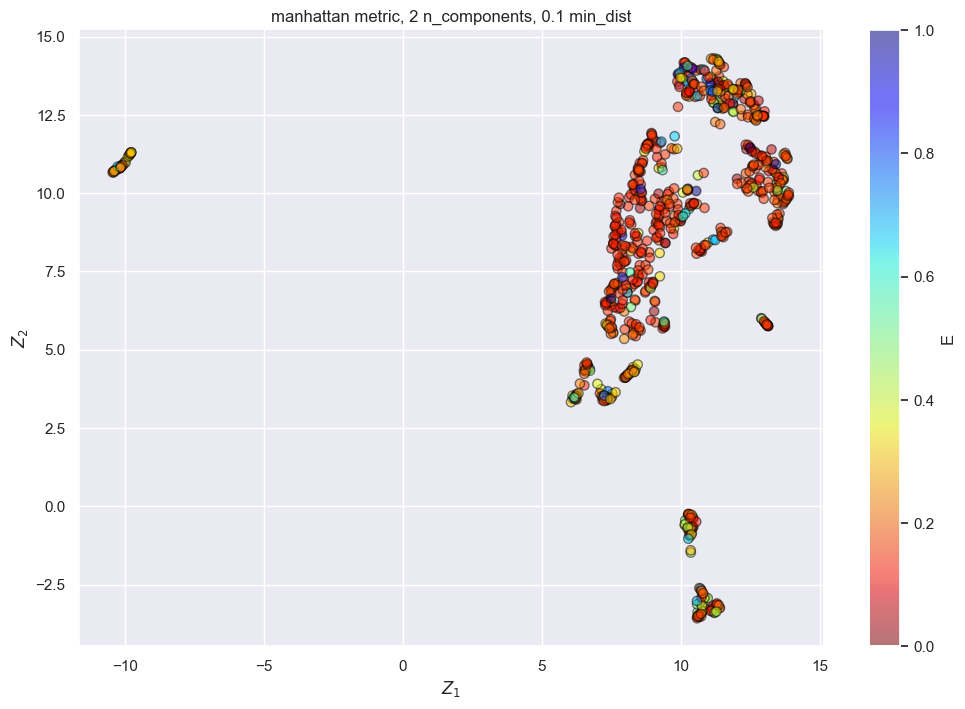

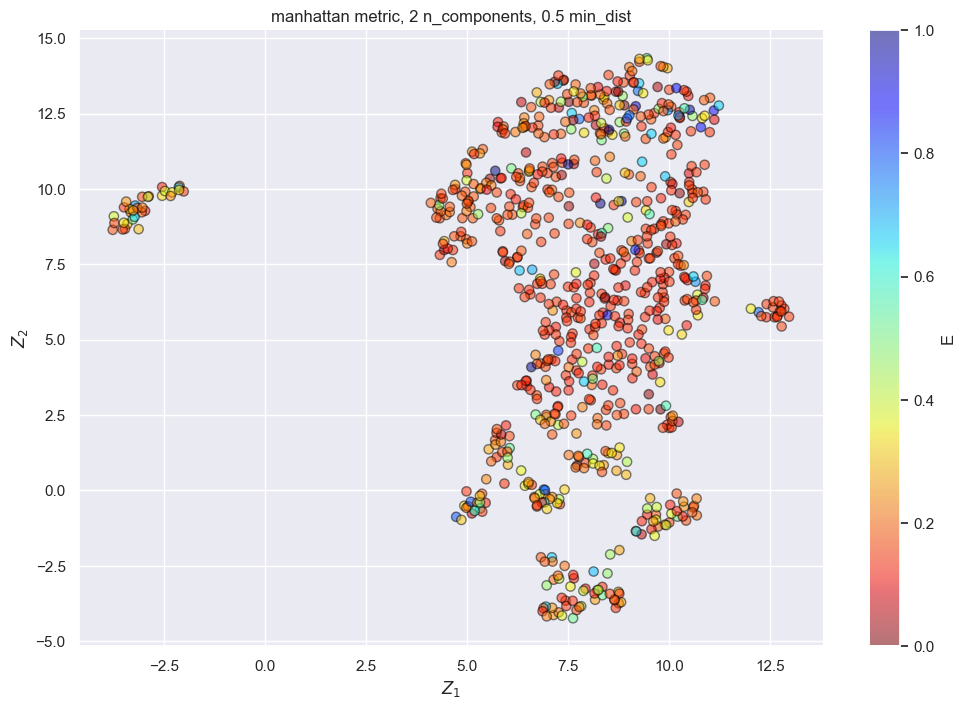

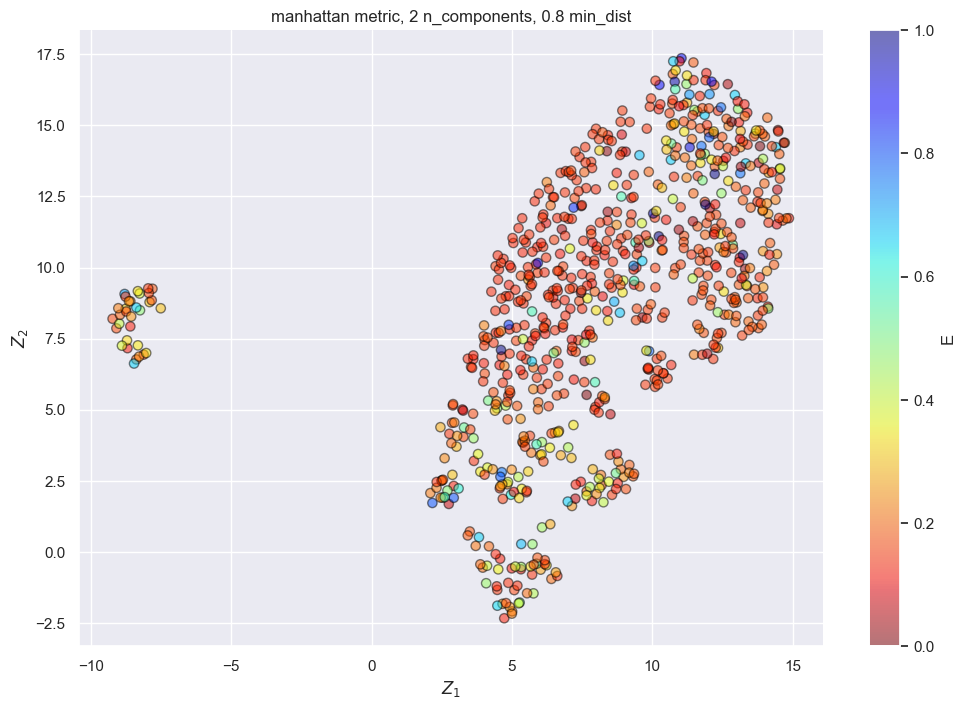

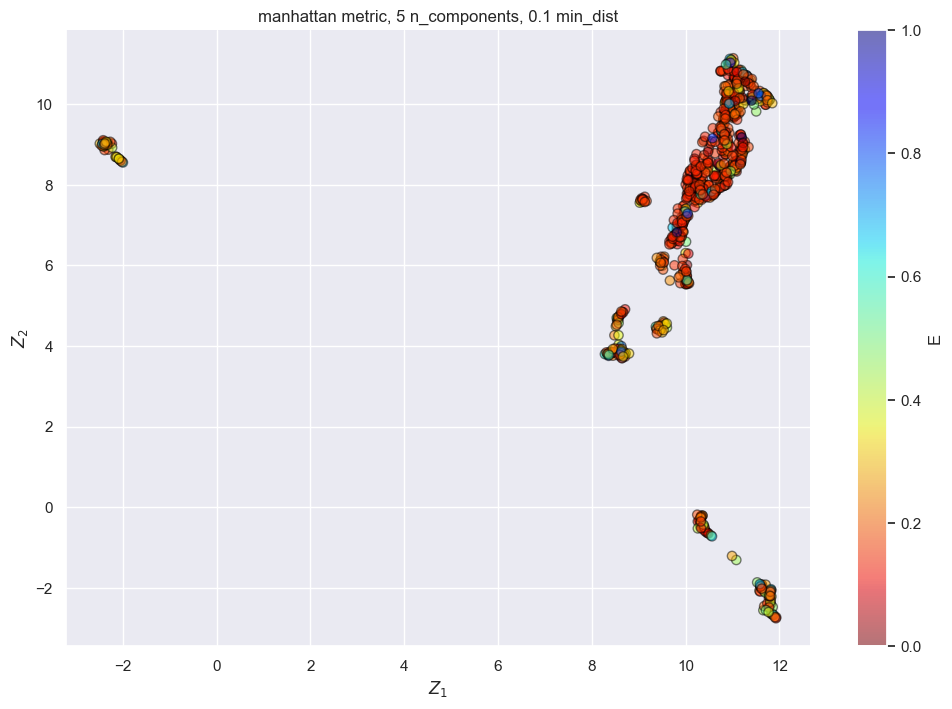

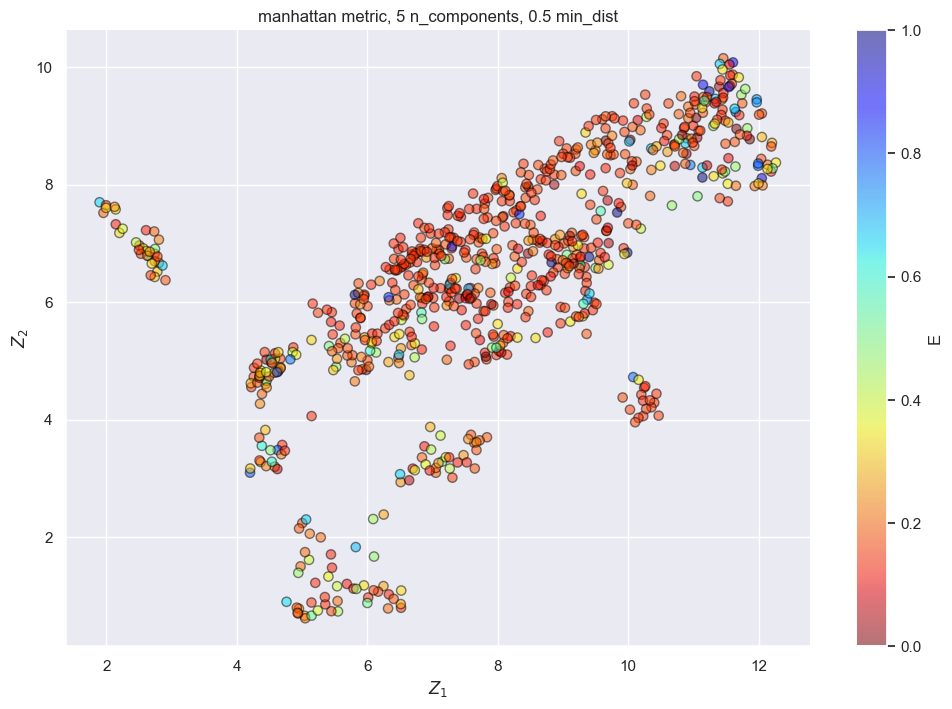

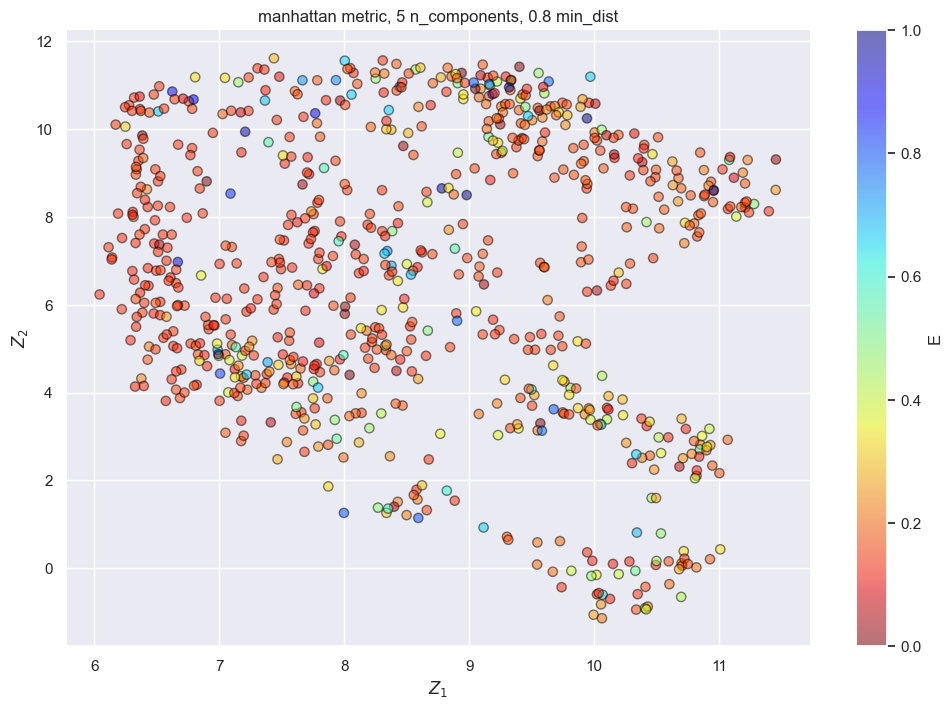

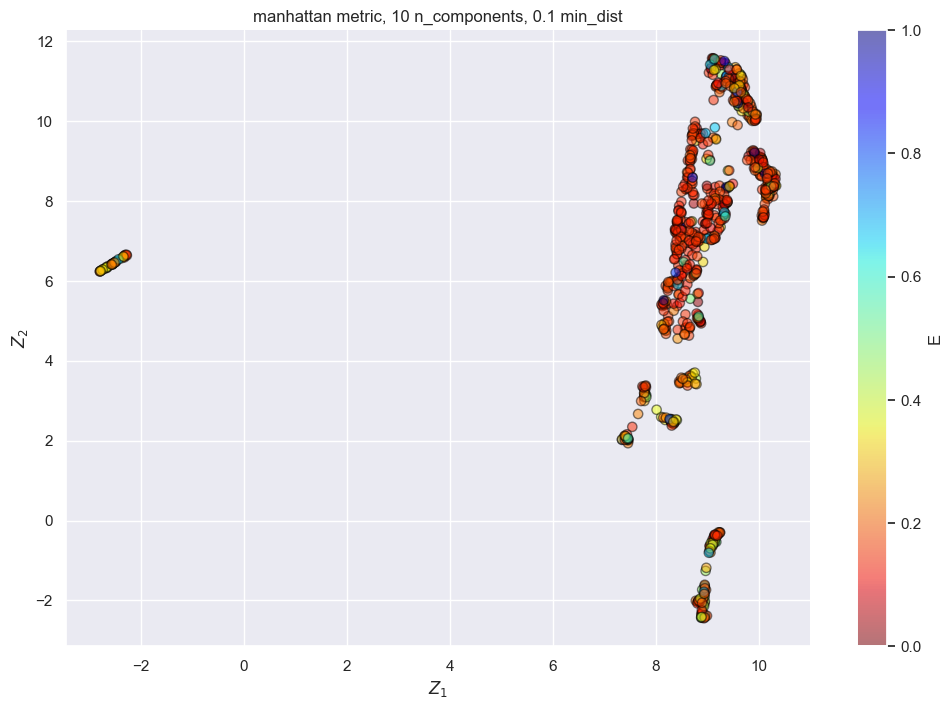

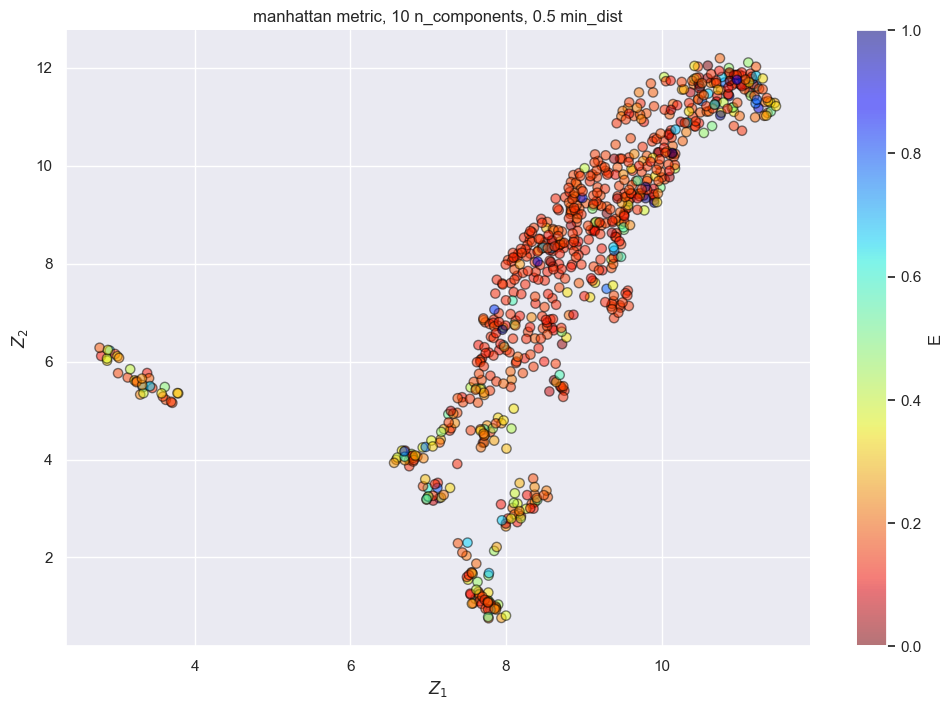

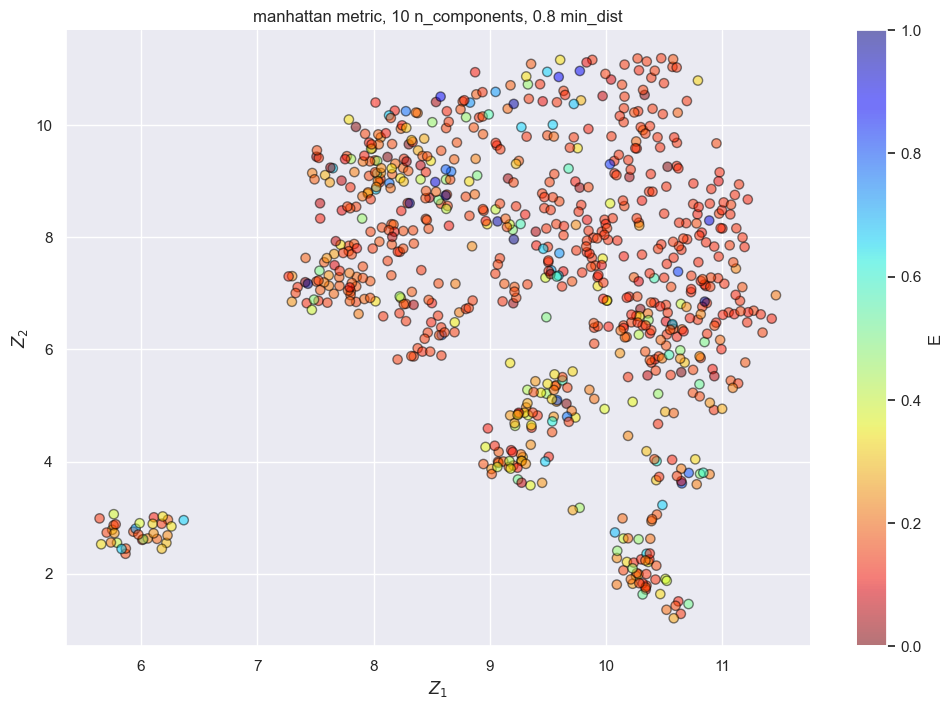

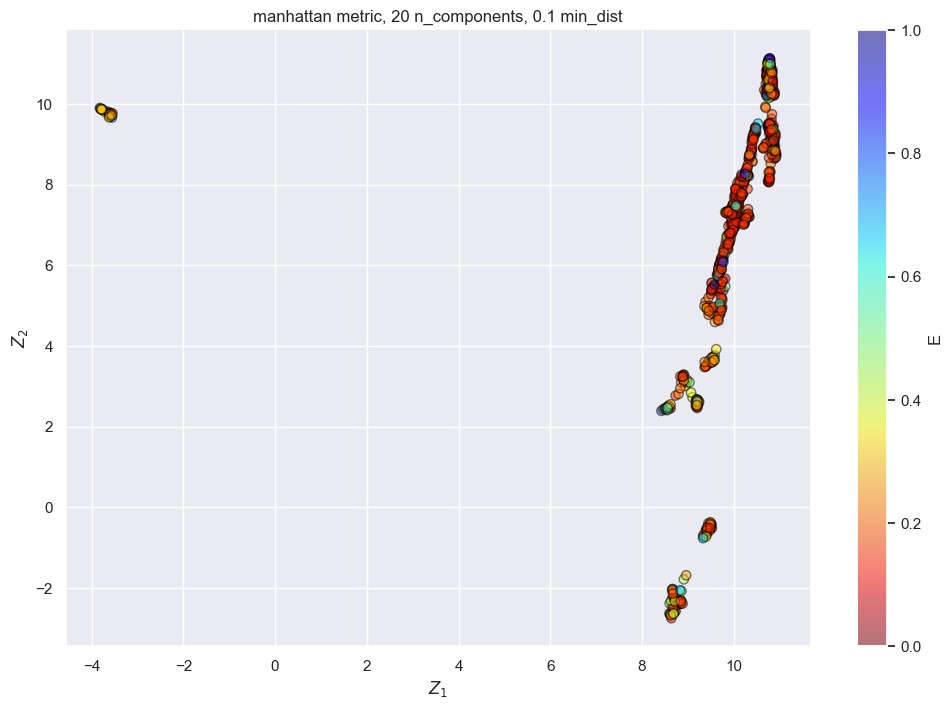

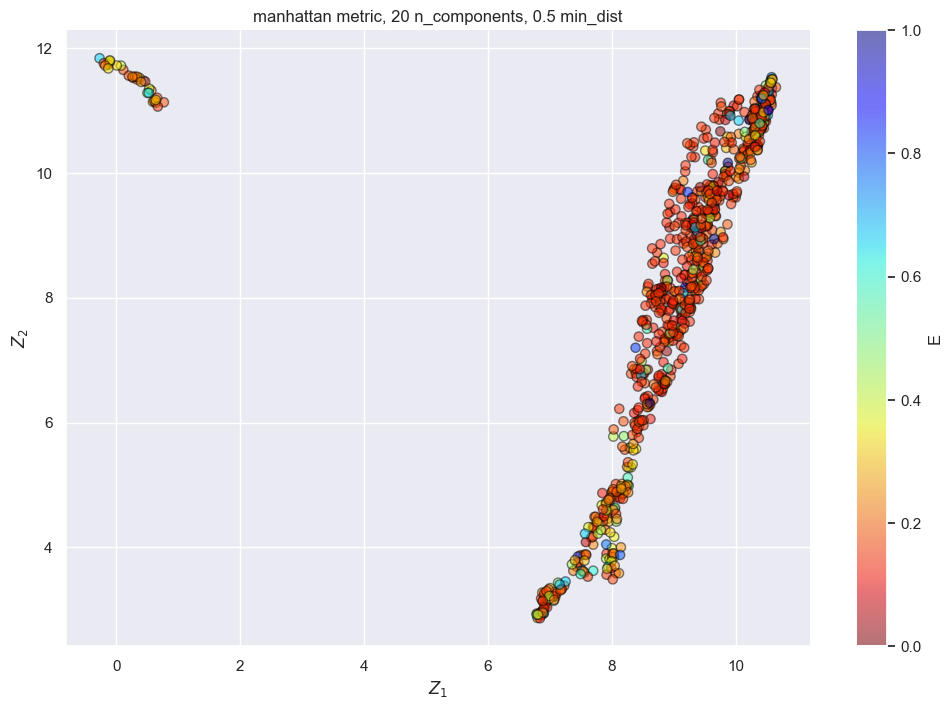

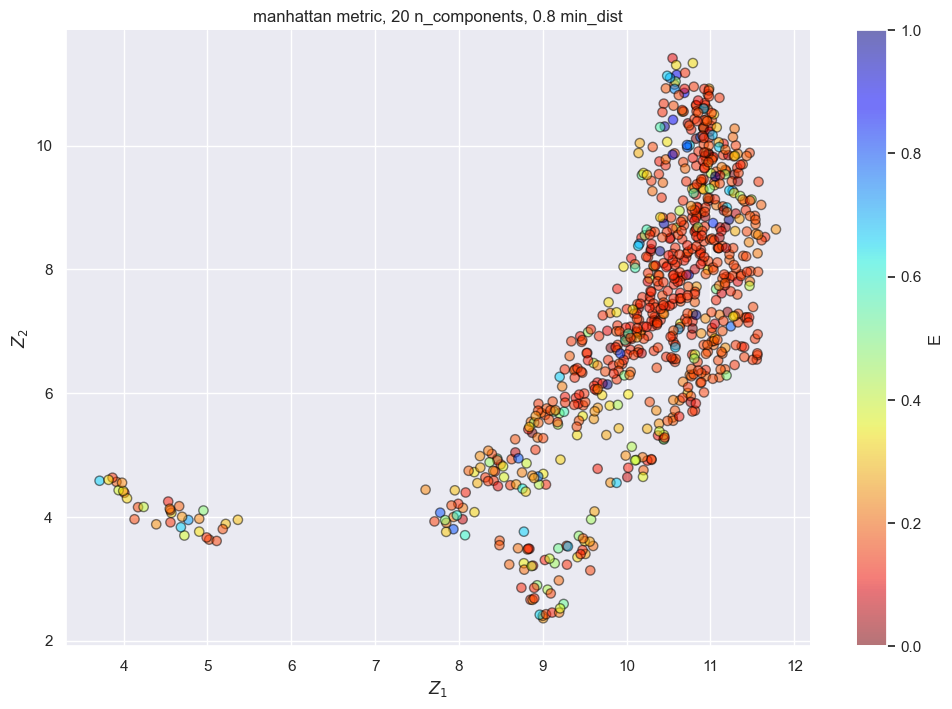

In [34]:
distances = ['euclidean', 'manhattan']
min_dist = [0.1, 0.5, 0.8]
n_components = [2, 5, 10, 20]
for dist, n_comp, min_d in product(distances, n_components, min_dist):
    #Plot results
    X_umap = umap.UMAP(n_components=n_comp, min_dist = min_d, metric = dist).fit_transform(X)
    fig = plt.figure(figsize=(12,8))
    ax  = fig.add_subplot(111)
    scatter = ax.scatter(X_umap[:,0], X_umap[:,1], c=y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
    colorbar = fig.colorbar(scatter, ax=ax, label = "E")
    plt.title(f'{dist} metric, {n_comp} n_components, {min_d} min_dist')
    plt.xlabel(r'$Z_1$')
    plt.ylabel(r'$Z_2$')
    sns.despine()
    plt.show()

Clustering is not observed, however, the optimal parameters may be the Manhattan method, components = 2,  min_dist = 0.8